In [1]:
%pylab inline
import pandas as pd
import numpy as np
import datetime as dt
import requests
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
url = 'https://raw.githubusercontent.com/adecate/Deep-Generative-models-VaR/main/Data/commodities_dataset.csv'
open('commodities_dataset.csv', 'wb').write(requests.get(url).content)
commodities = pd.read_csv('commodities_dataset.csv')#, index_col='Date'

url = 'https://raw.githubusercontent.com/adecate/Deep-Generative-models-VaR/main/Data/stocks_dataset.csv'
open('stocks_dataset.csv', 'wb').write(requests.get(url).content);
stocks = pd.read_csv('stocks_dataset.csv')#, index_col='Date'

# Stocks

In [4]:
stocks['Date'] =  pd.to_datetime(stocks['Date'])
stocks['year'] = stocks['Date'].dt.year
stocks = stocks.set_index('Date')
stocks

,AMD,NFLX,CVX,EA,LMT,PFE,HCA,MT,WMT,NKE,V,JNJ,SE,GE,RYCEY,year
Date,,,,,,,,,,,,,,,,
2013-01-02,2.530000,13.144286,110.389999,14.550000,93.269997,24.582542,31.299999,53.549999,69.239998,25.920000,38.845001,70.839996,NaN,128.145081,14.892,2013
2013-01-03,2.490000,13.798571,109.919998,14.740000,93.550003,24.525618,31.650000,52.650002,68.800003,26.184999,38.875000,70.739998,NaN,126.703896,14.670,2013
2013-01-04,2.590000,13.711429,110.500000,14.880000,93.900002,24.629980,31.940001,53.310001,69.059998,26.440001,39.192501,71.550003,NaN,127.304390,14.742,2013
2013-01-07,2.670000,14.171429,109.750000,14.450000,94.220001,24.648956,32.320000,52.950001,68.400002,26.480000,39.472500,71.400002,NaN,126.884048,14.528,2013
2013-01-08,2.670000,13.880000,109.260002,13.770000,92.959999,24.686907,31.700001,52.590000,68.589996,26.200001,39.840000,71.410004,NaN,125.502914,14.390,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,124.230003,399.290009,155.789993,127.139999,458.630005,38.369999,271.190002,26.760000,149.779999,106.190002,228.220001,158.179993,61.279999,105.459999,1.810,2023
2023-06-07,117.830002,399.769989,159.830002,126.239998,461.750000,38.889999,273.529999,26.830000,150.000000,107.089996,225.270004,158.520004,60.970001,106.080002,1.820,2023
2023-06-08,121.050003,409.369995,159.240005,127.110001,464.170013,39.090000,273.489990,27.370001,152.169998,106.199997,223.050003,160.259995,63.540001,106.070000,1.830,2023


In [5]:
stocks = stocks[stocks['year'] >= 2021]
stocks = stocks.drop(columns=['year'])

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 614 entries, 2021-01-04 to 2023-06-12
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMD     614 non-null    float64
 1   NFLX    614 non-null    float64
 2   CVX     614 non-null    float64
 3   EA      614 non-null    float64
 4   LMT     614 non-null    float64
 5   PFE     614 non-null    float64
 6   HCA     614 non-null    float64
 7   MT      614 non-null    float64
 8   WMT     614 non-null    float64
 9   NKE     614 non-null    float64
 10  V       614 non-null    float64
 11  JNJ     614 non-null    float64
 12  SE      614 non-null    float64
 13  GE      614 non-null    float64
 14  RYCEY   614 non-null    float64
dtypes: float64(15)
memory usage: 76.8 KB


In [7]:
stocks_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))

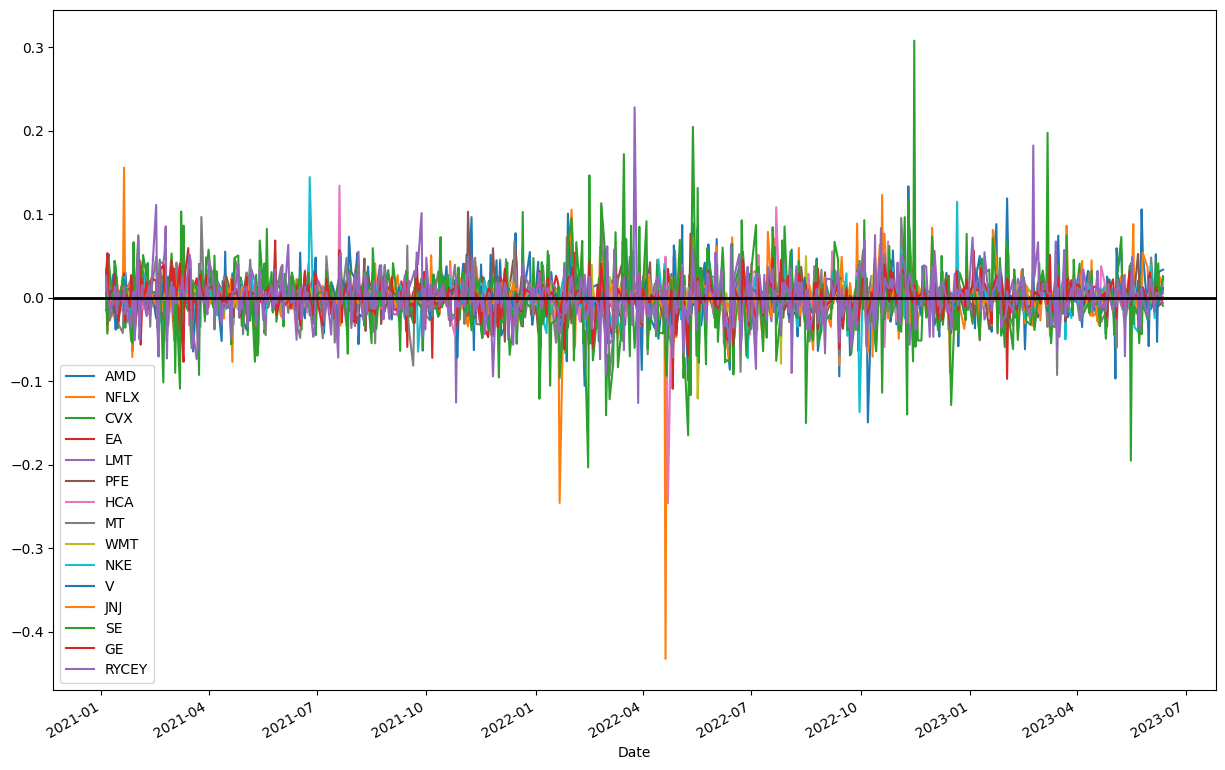

In [8]:
stocks_change[:].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

In [9]:
weights = np.array([1/15]*15)
stocks_portf = pd.DataFrame()
stocks_portf['protfolio'] = stocks.dot(weights)
stocks_portf['diff'] = stocks_portf.protfolio - stocks_portf.protfolio.shift(1)
stocks_portf

,protfolio,diff
Date,,
2021-01-04,155.483761,NaN
2021-01-05,156.603995,1.120235
2021-01-06,155.060305,-1.543691
2021-01-07,157.025501,1.965197
2021-01-08,157.281979,0.256477
...,...,...
2023-06-06,160.821334,0.777332
2023-06-07,160.961333,0.140000
2023-06-08,162.267333,1.306000


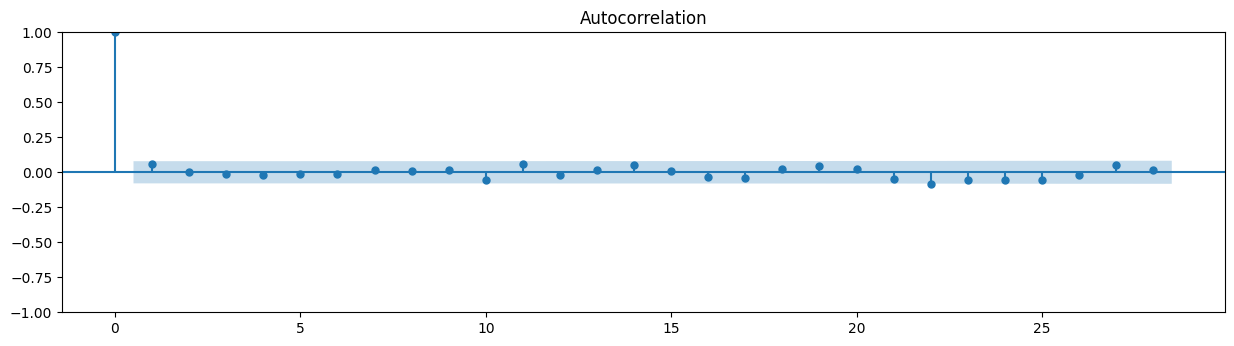

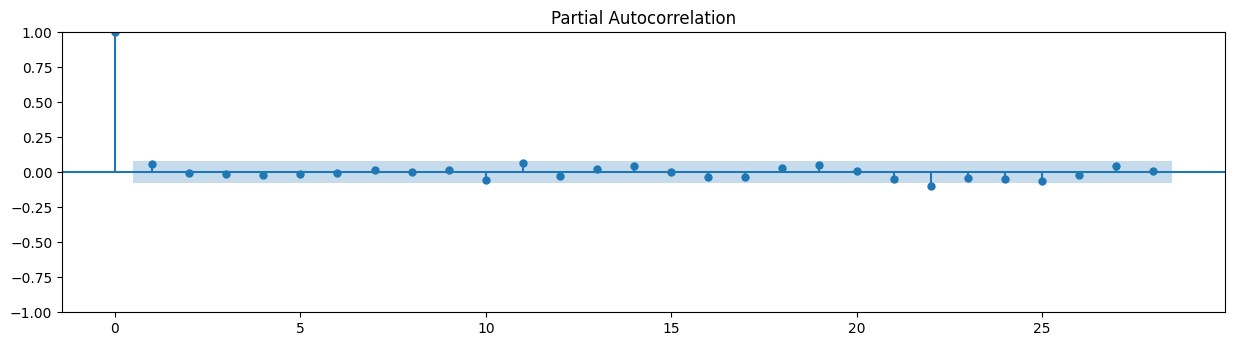

In [10]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(stocks_portf['diff'][1:].values.squeeze(), ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(stocks_portf['diff'][1:].values.squeeze(), ax=ax)
plt.show()

In [11]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import scipy.stats as stats


def ticket_distr(df, ticket):
    fig, ax = plt.subplots(figsize=(10, 6))

    values = df[ticket]

    shape, loc, scale = stats.t.fit(values)
    x = np.linspace(values.min(), values.max(), len(values))
    pdf = stats.t.pdf(x, shape, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

    ax.hist(values, bins=50, density =True,alpha=0.5)
    ax.plot(x, pdf, 'r-', lw=2, label=label)
    ax.legend(loc='best')
    ax.set_title(ticket)

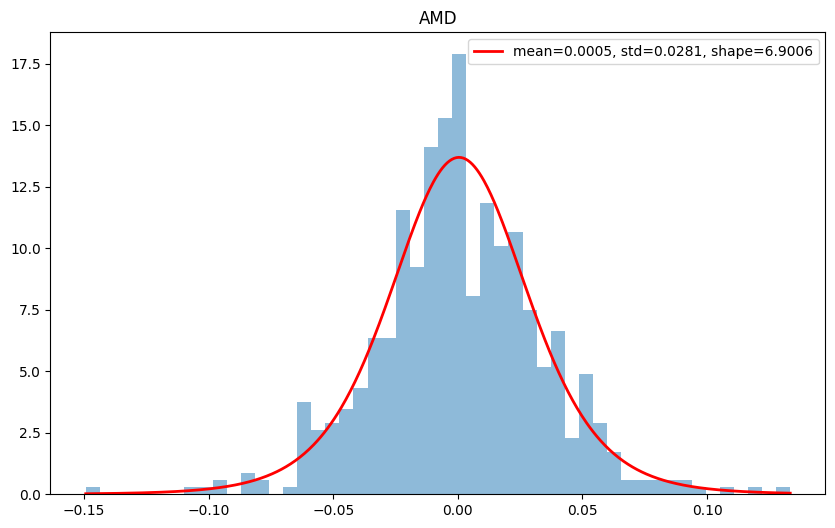

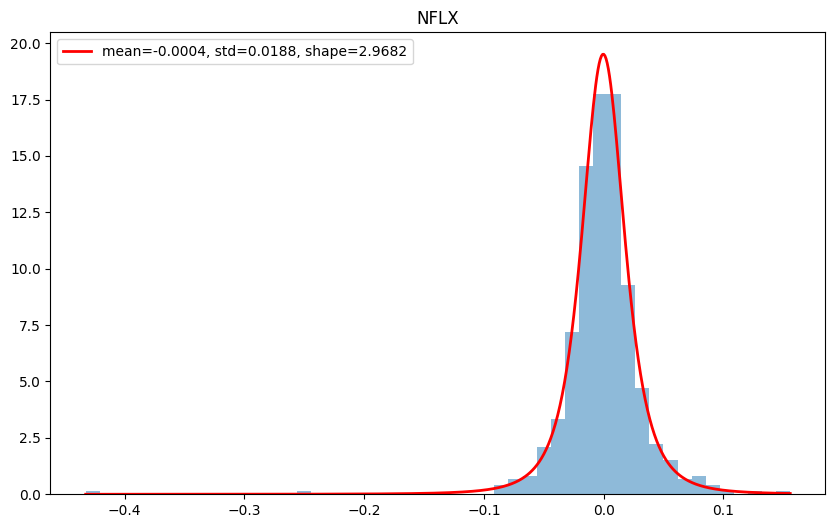

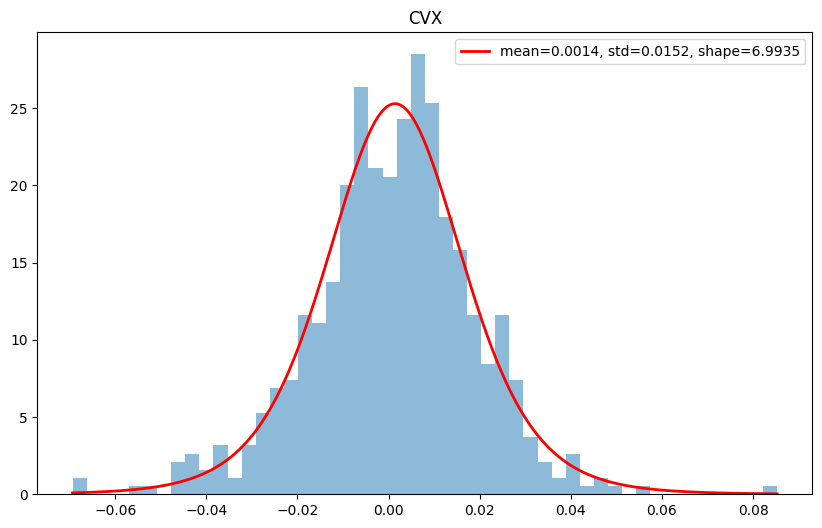

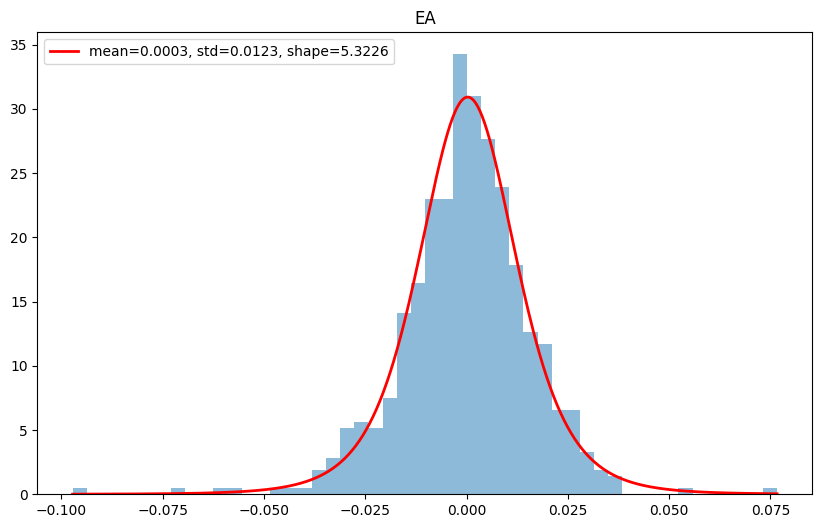

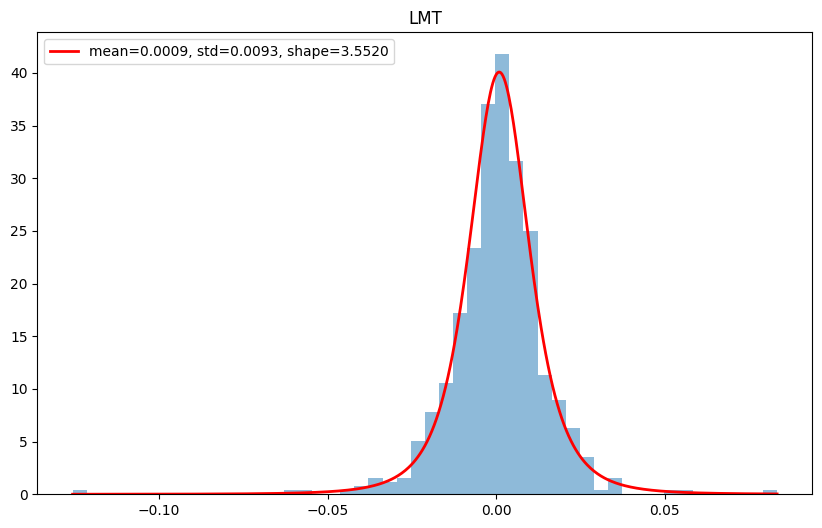

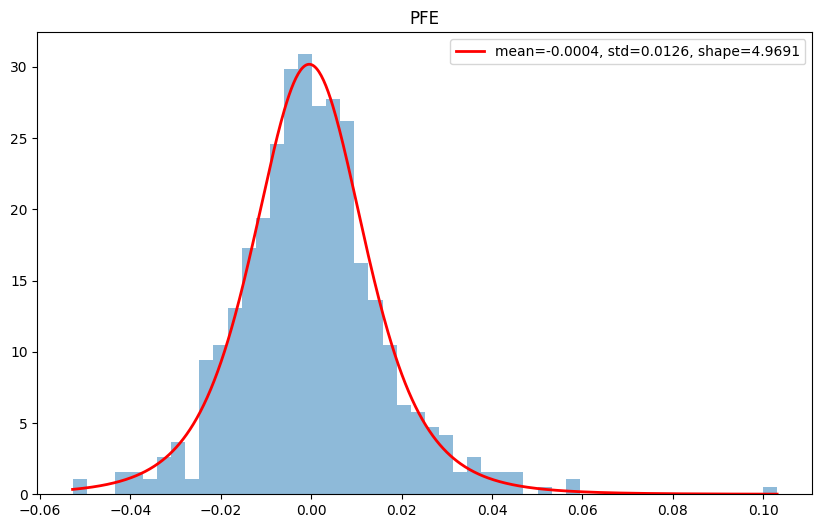

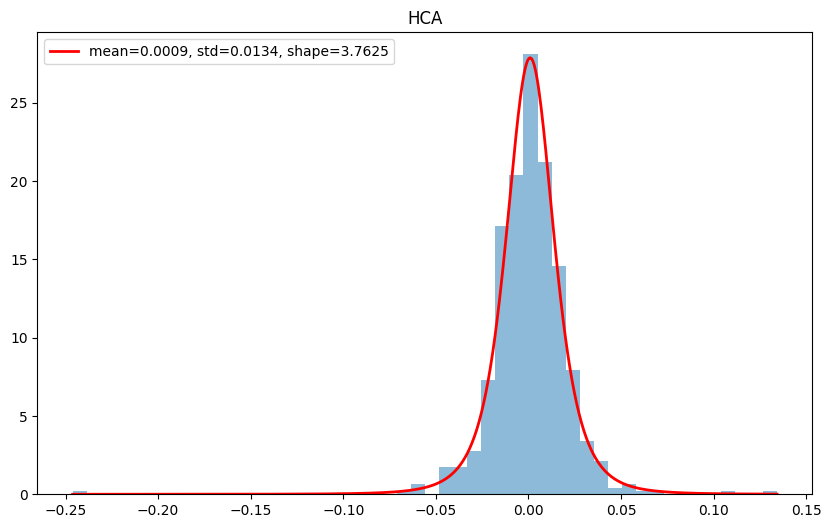

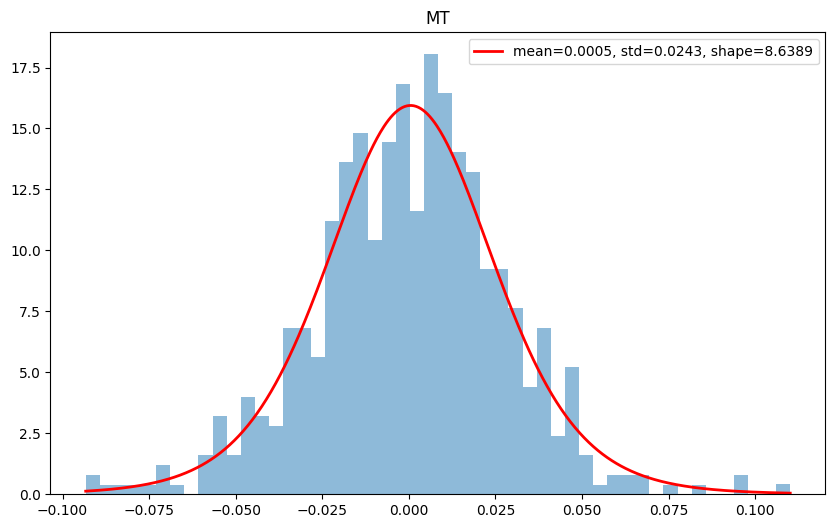

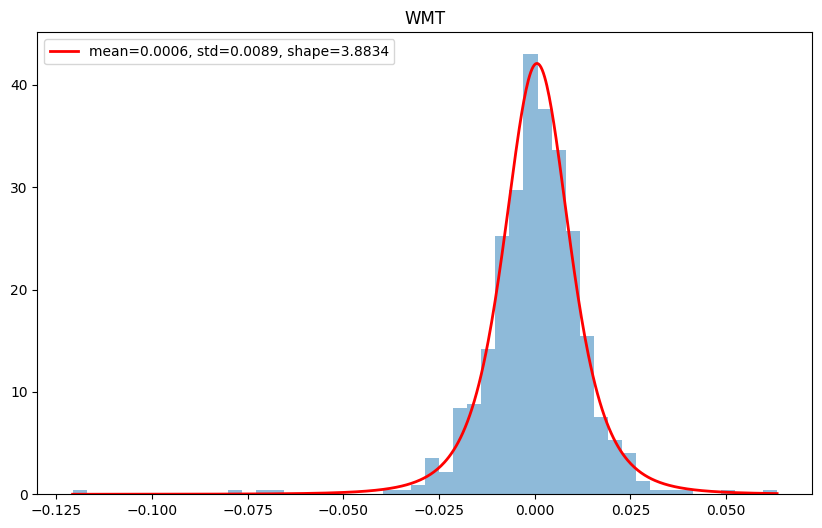

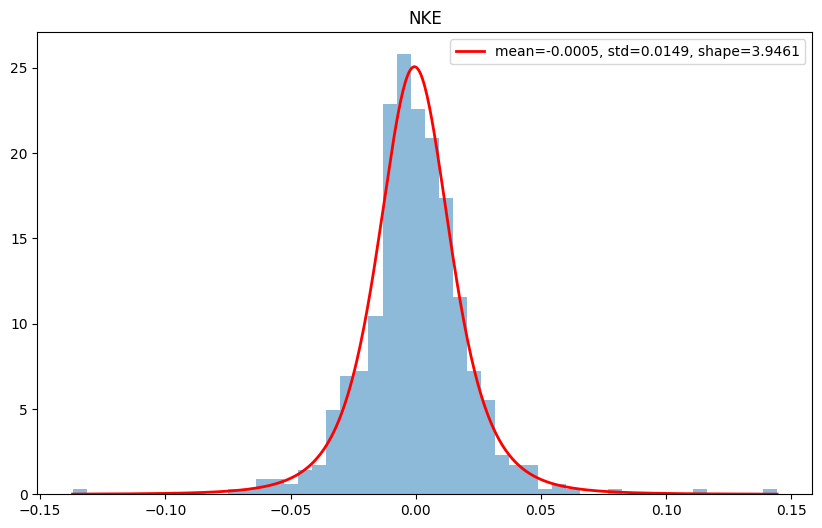

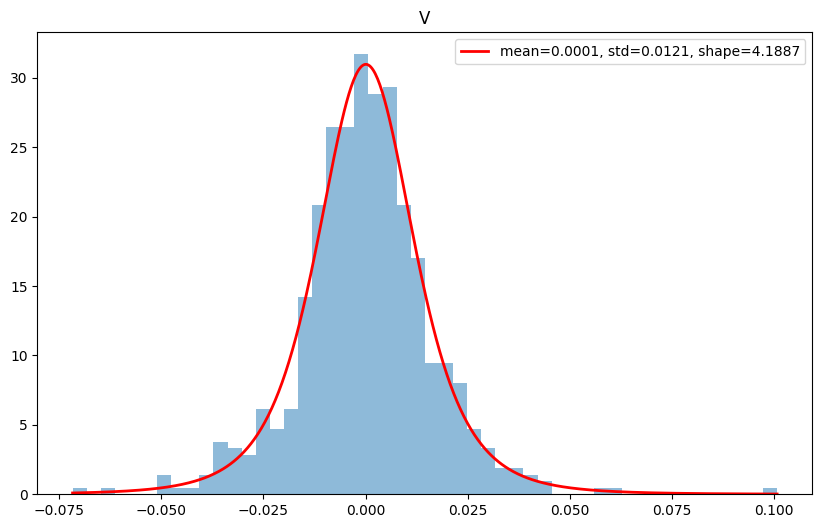

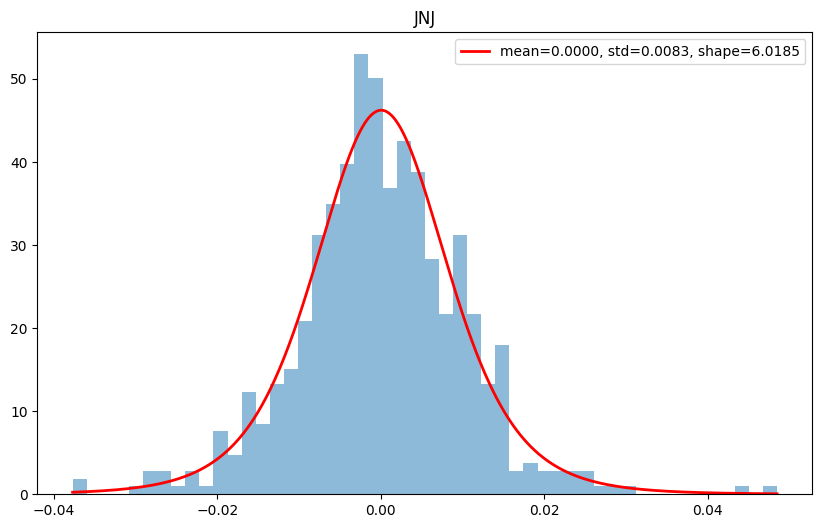

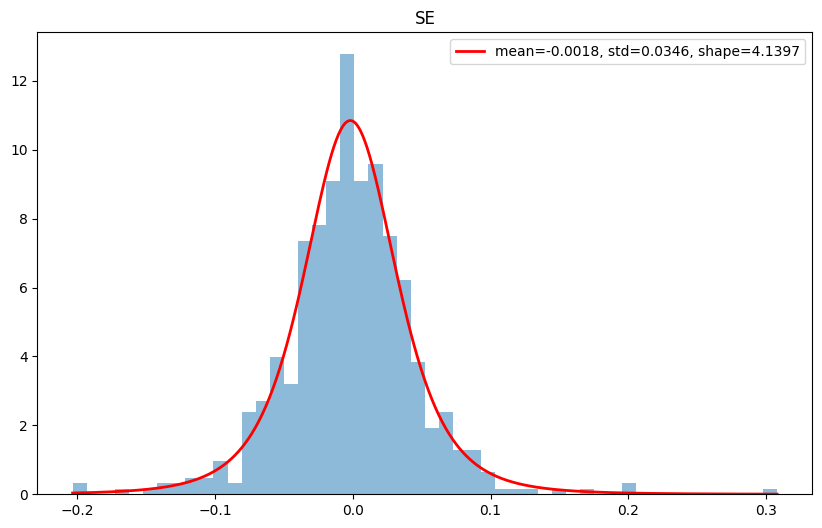

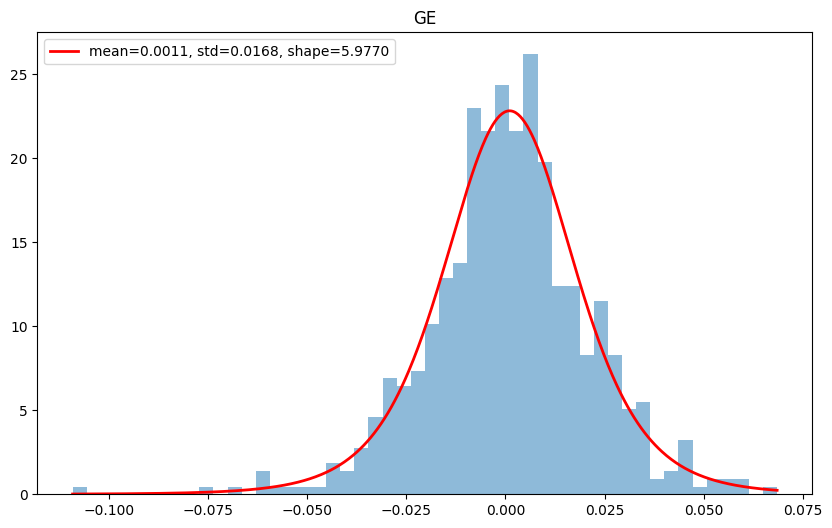

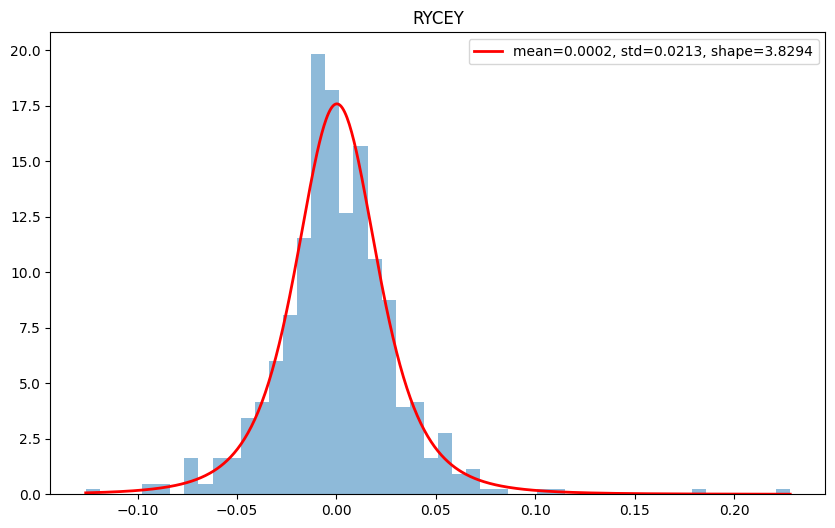

In [12]:
for ticket in stocks.columns:
    ticket_distr(stocks_change[1:], ticket)

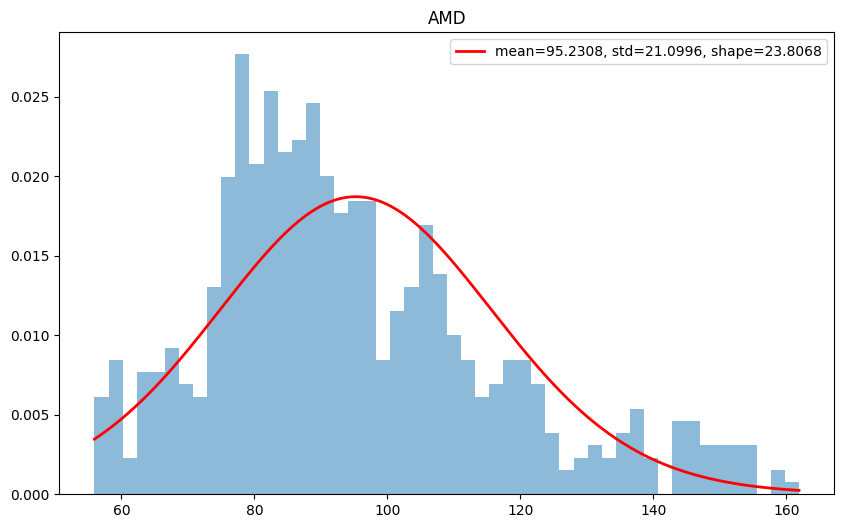

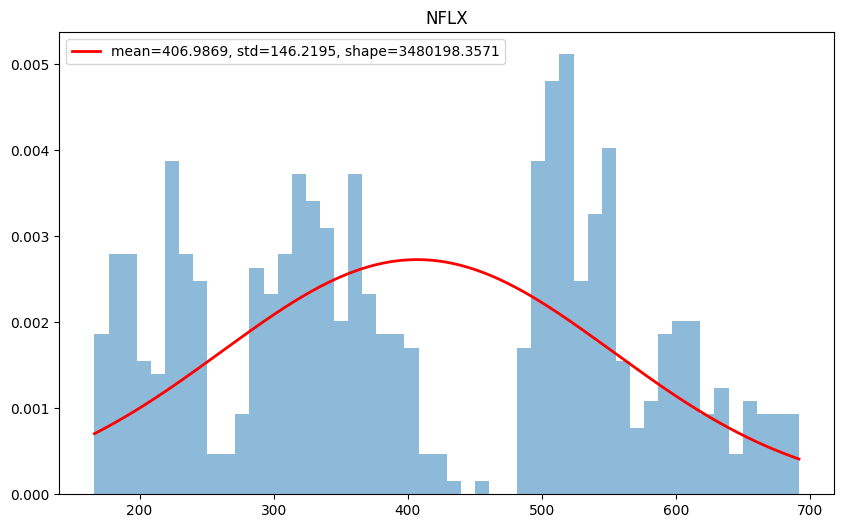

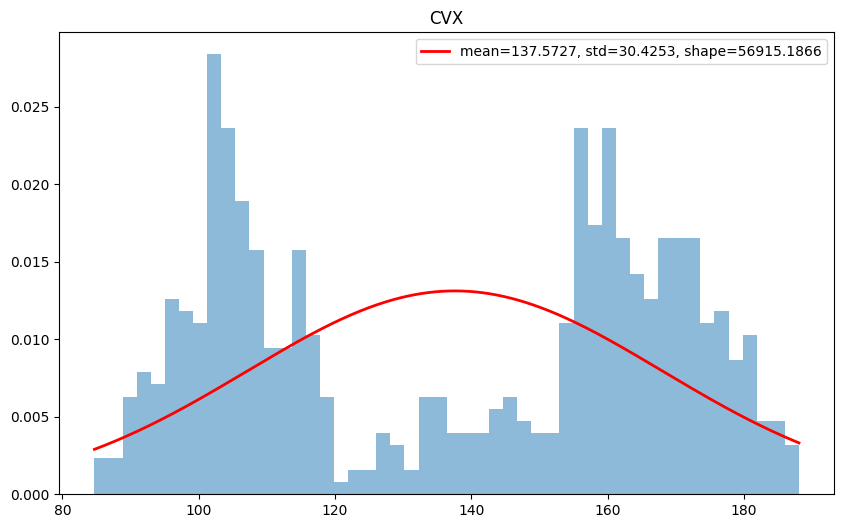

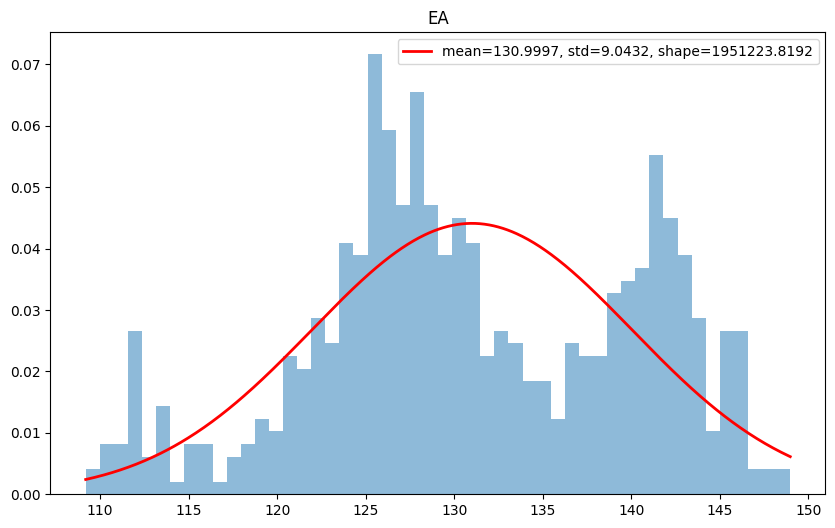

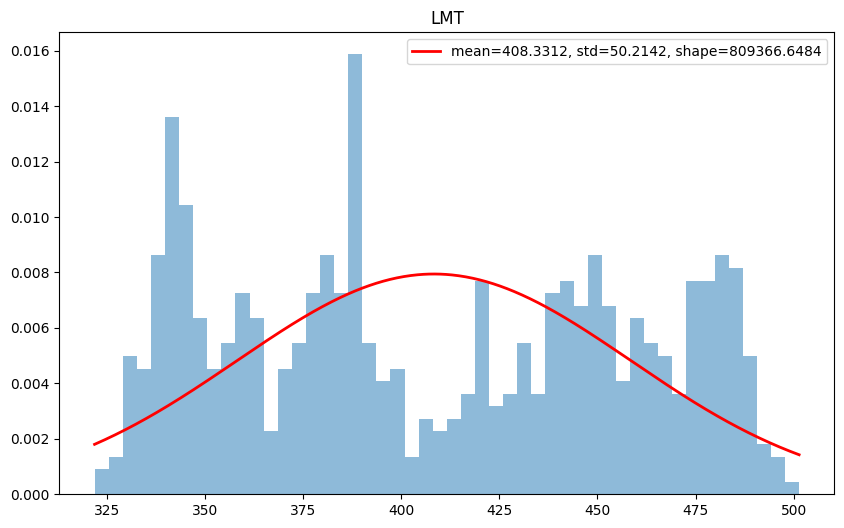

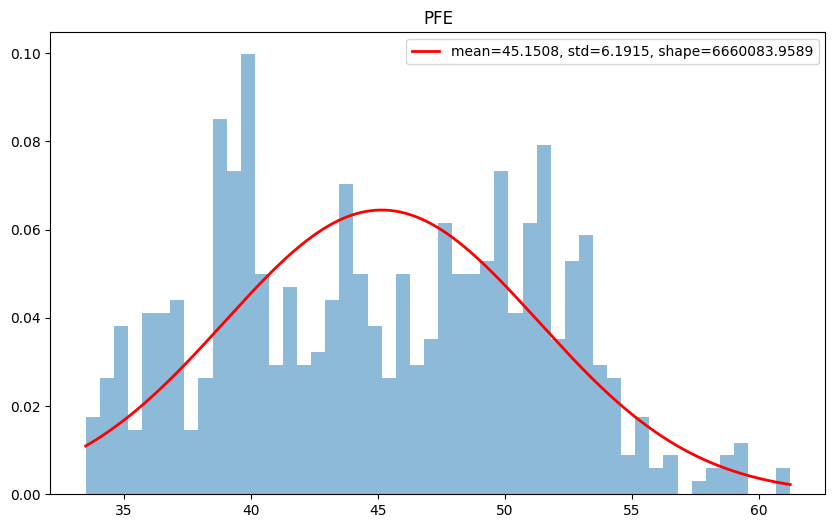

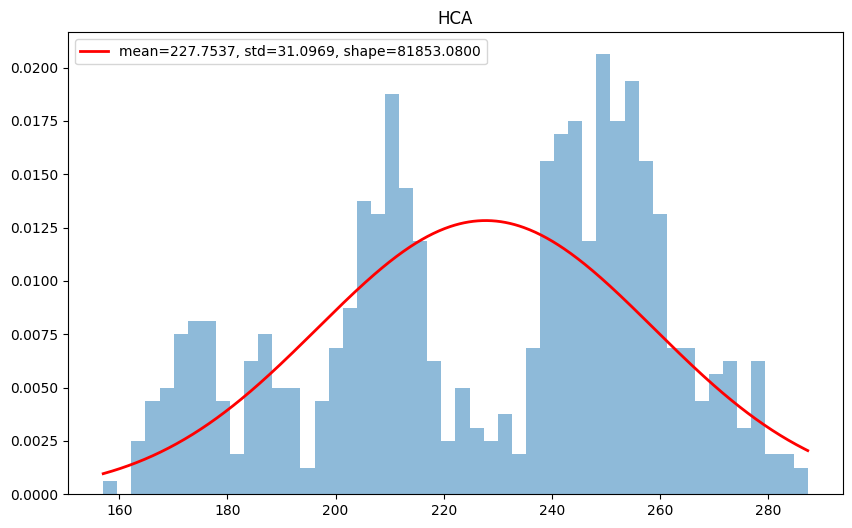

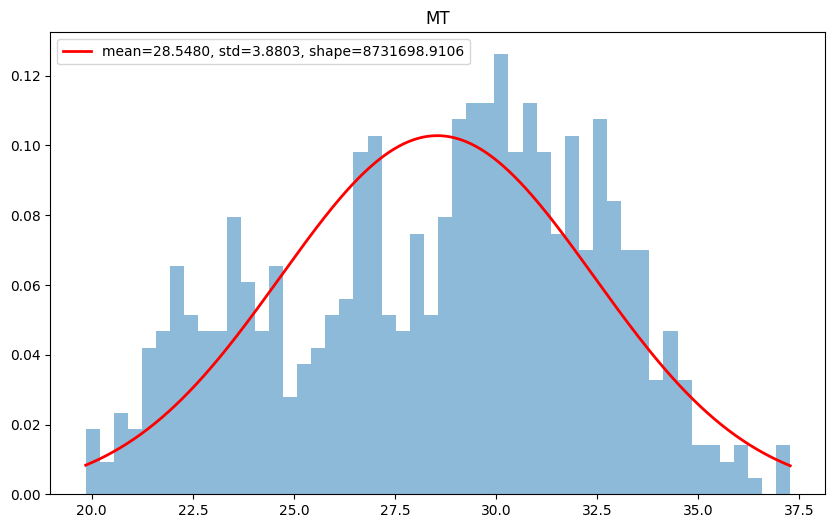

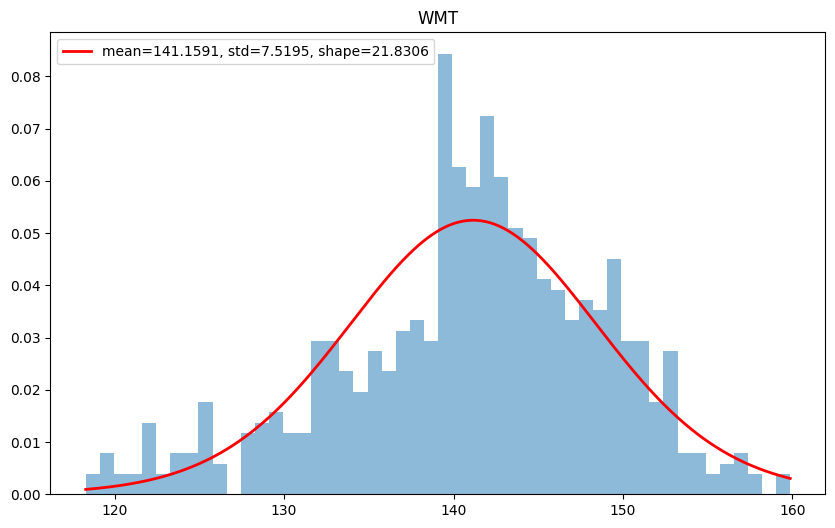

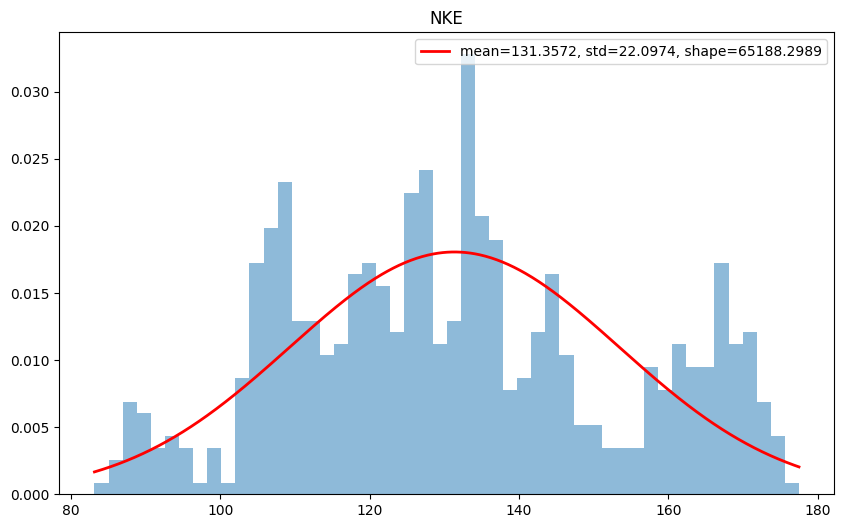

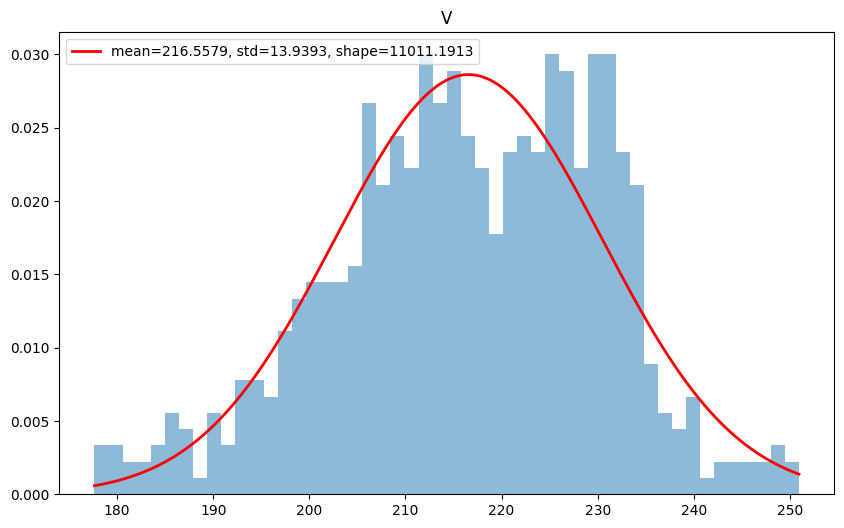

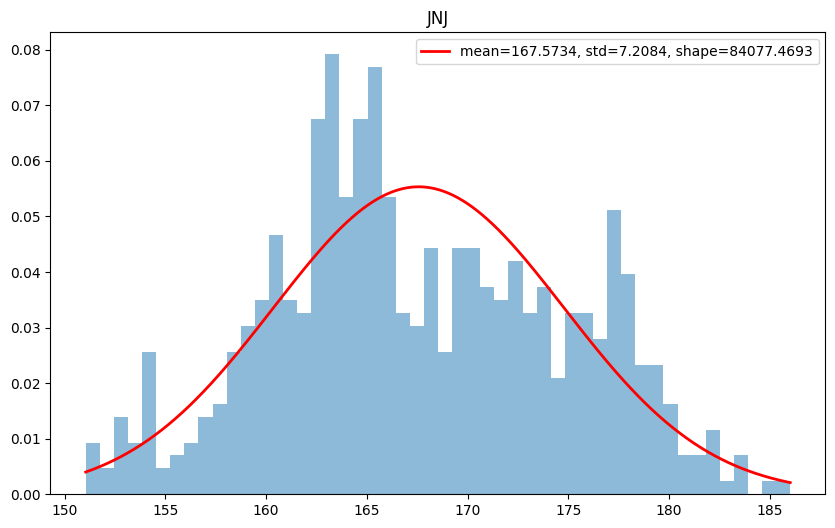

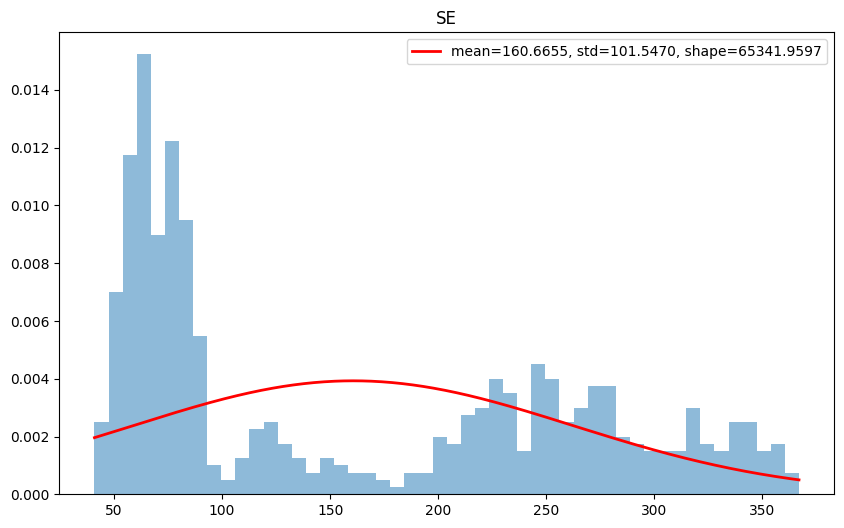

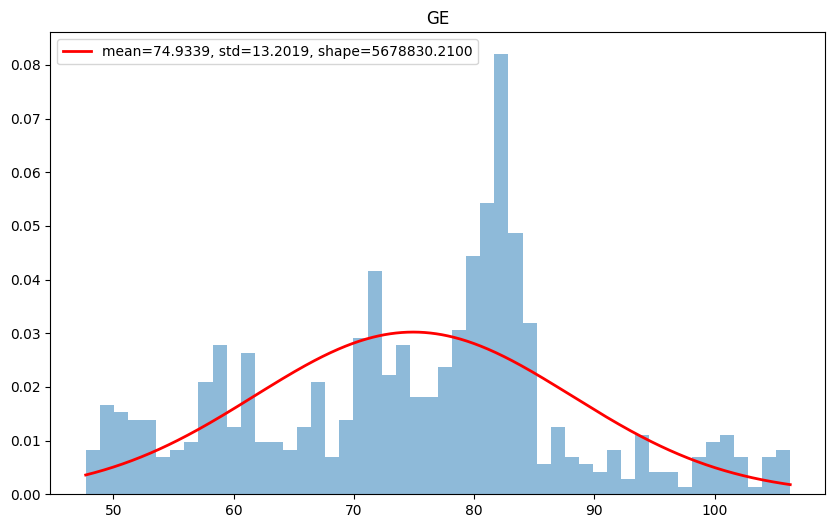

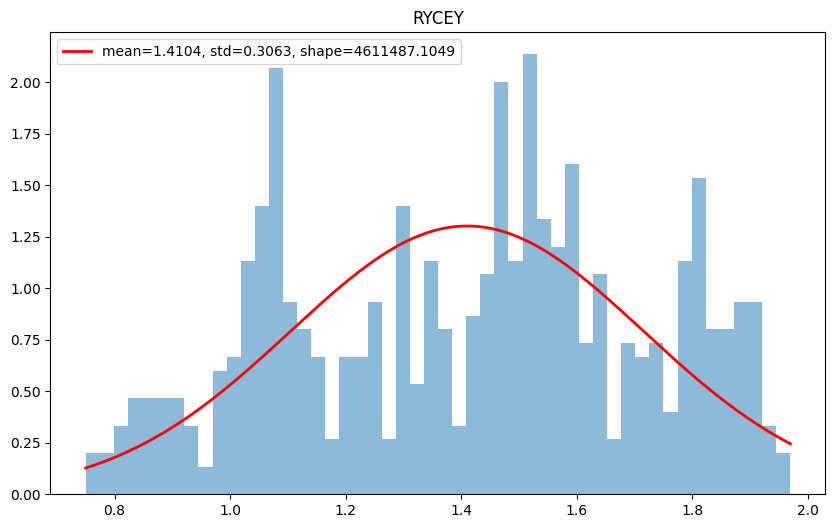

In [13]:
for ticket in stocks.columns:
    ticket_distr(stocks, ticket)

<Axes: >

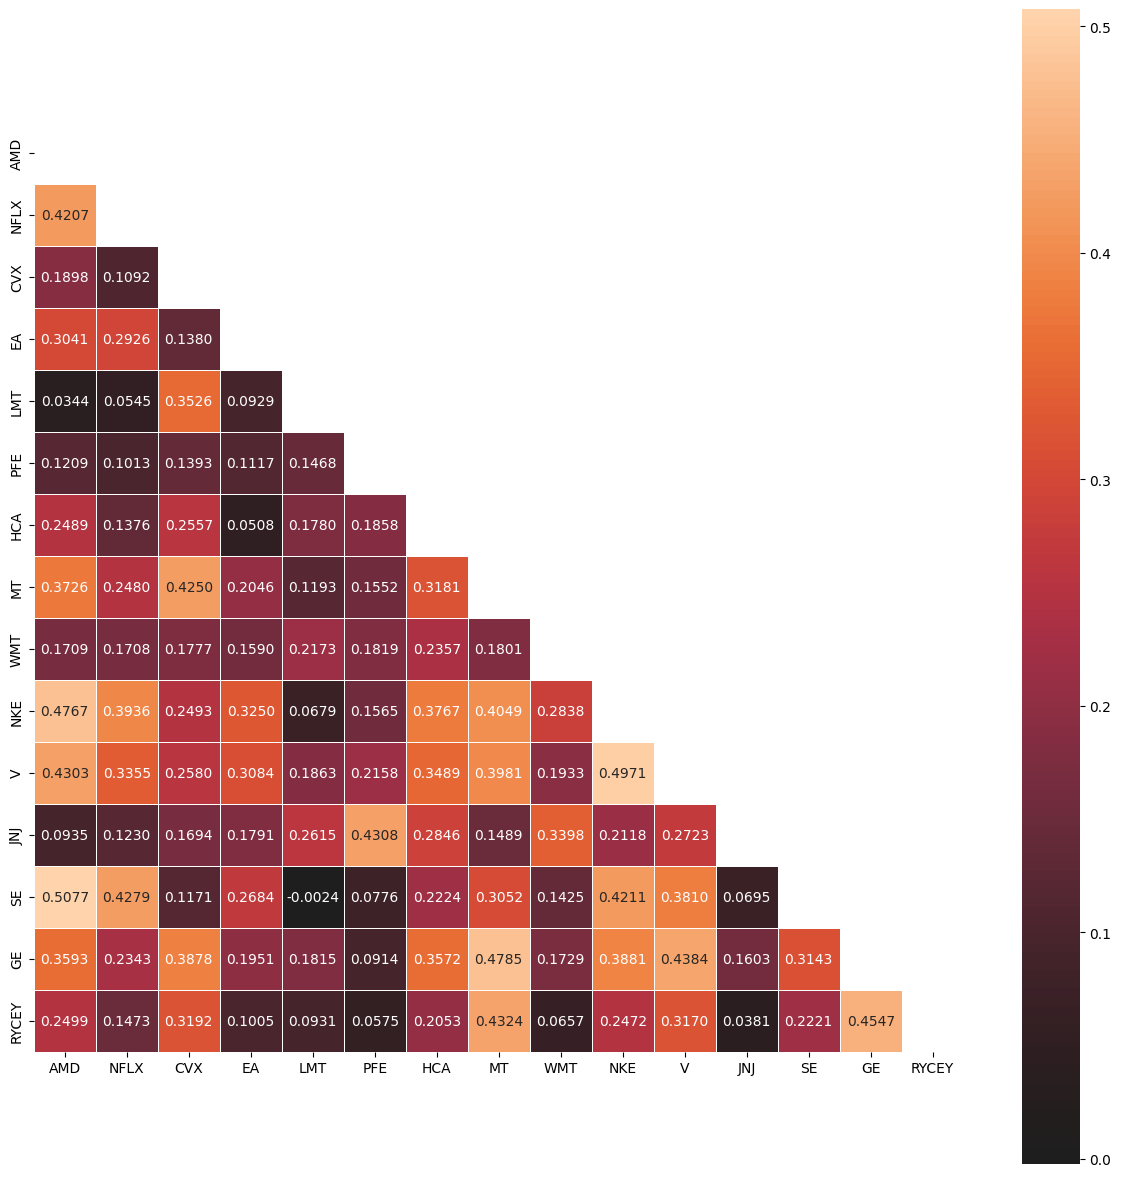

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = stocks_change.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

#Commodities

In [15]:
commodities.isna().sum()
commodities = commodities.dropna()

In [16]:
commodities['Date'] =  pd.to_datetime(commodities['Date'])
commodities['year'] = commodities['Date'].dt.year
commodities = commodities.set_index('Date')
commodities

,GC=F,SI=F,HG=F,CL=F,NG=F,ZC=F,ZO=F,KE=F,ZS=F,HE=F,LE=F,CC=F,KC=F,CT=F,SB=F,year
Date,,,,,,,,,,,,,,,,
2013-01-02,1687.900024,30.952000,3.7245,93.120003,3.233,690.75,335.50,811.00,1405.50,86.175003,132.375000,2259.0,149.399994,75.360001,19.690001,2013
2013-01-03,1673.699951,30.671000,3.7015,92.919998,3.198,689.25,337.75,811.25,1403.00,86.400002,133.850006,2256.0,146.500000,75.389999,19.100000,2013
2013-01-04,1648.099976,29.896000,3.6785,93.089996,3.287,680.25,332.75,804.50,1389.00,86.224998,132.949997,2220.0,147.350006,75.050003,18.850000,2013
2013-01-07,1645.500000,30.032000,3.6630,93.190002,3.266,685.50,331.50,807.50,1410.75,86.300003,133.000000,2267.0,150.399994,75.709999,18.860001,2013
2013-01-08,1661.500000,30.415001,3.6570,93.150002,3.218,688.75,331.75,808.75,1413.75,86.349998,132.550003,2215.0,148.149994,75.120003,18.670000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,1962.199951,24.334000,3.7890,70.169998,2.254,604.25,358.50,797.75,1386.50,87.875000,178.225006,3180.0,190.649994,84.040001,25.379999,2023
2023-06-12,1955.300049,23.985001,3.7505,67.120003,2.266,617.25,366.00,796.50,1372.75,87.175003,179.074997,3136.0,185.550003,83.489998,25.469999,2023
2023-06-13,1944.599976,23.756001,3.8285,69.419998,2.340,612.50,377.00,791.75,1399.25,87.125000,179.425003,3186.0,182.750000,82.720001,25.160000,2023


In [17]:
commodities = commodities[commodities['year'] >= 2021]
commodities = commodities.drop(columns=['year'])

In [18]:
commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 613 entries, 2021-01-04 to 2023-06-15
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    613 non-null    float64
 1   SI=F    613 non-null    float64
 2   HG=F    613 non-null    float64
 3   CL=F    613 non-null    float64
 4   NG=F    613 non-null    float64
 5   ZC=F    613 non-null    float64
 6   ZO=F    613 non-null    float64
 7   KE=F    613 non-null    float64
 8   ZS=F    613 non-null    float64
 9   HE=F    613 non-null    float64
 10  LE=F    613 non-null    float64
 11  CC=F    613 non-null    float64
 12  KC=F    613 non-null    float64
 13  CT=F    613 non-null    float64
 14  SB=F    613 non-null    float64
dtypes: float64(15)
memory usage: 76.6 KB


In [19]:
commodities_change = commodities.apply(lambda x: np.log(x) - np.log(x.shift(1)))

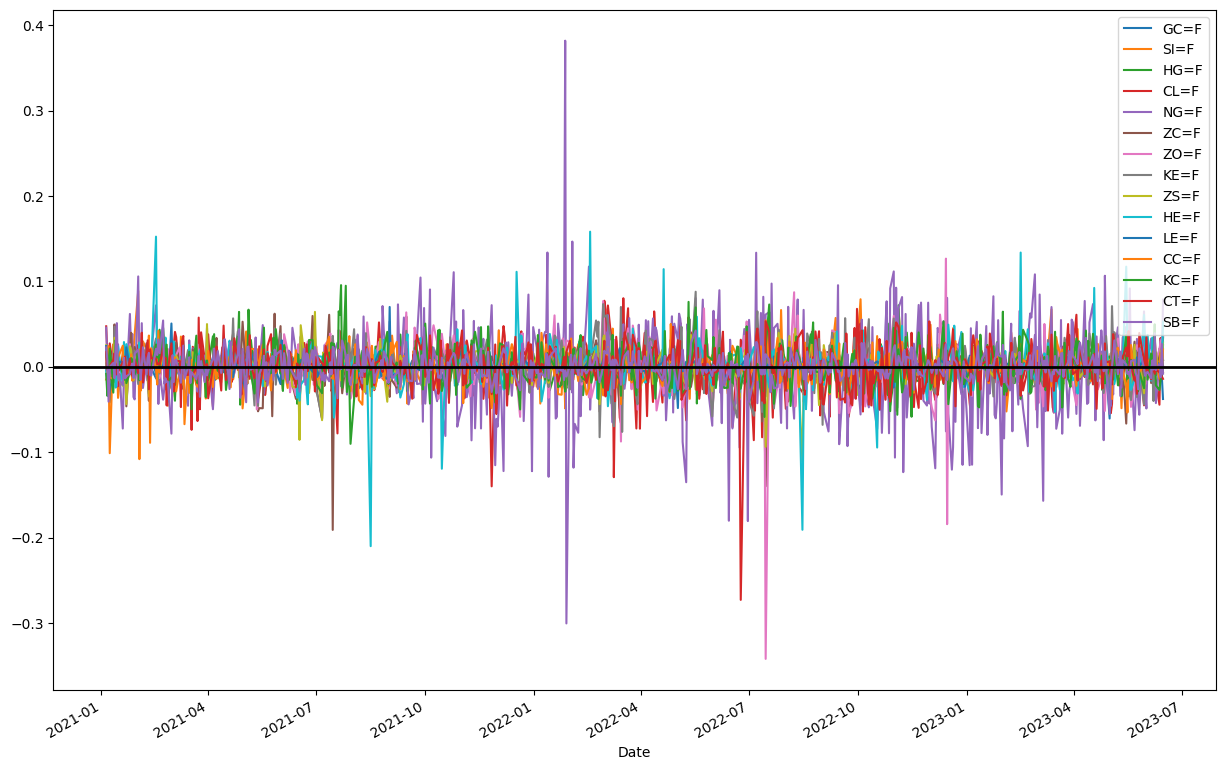

In [20]:
commodities_change[:].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

In [21]:
weights = np.array([1/15]*15)
commodities_portf = pd.DataFrame()
commodities_portf['protfolio'] = commodities.dot(weights)
commodities_portf['diff'] = commodities_portf.protfolio - commodities_portf.protfolio.shift(1)
commodities_portf

,protfolio,diff
Date,,
2021-01-04,515.859530,NaN
2021-01-05,518.155897,2.296367
2021-01-06,513.490268,-4.665629
2021-01-07,516.837637,3.347368
2021-01-08,510.669365,-6.168272
...,...,...
2023-06-09,597.061130,2.401631
2023-06-12,593.445437,-3.615693
2023-06-13,597.841632,4.396195


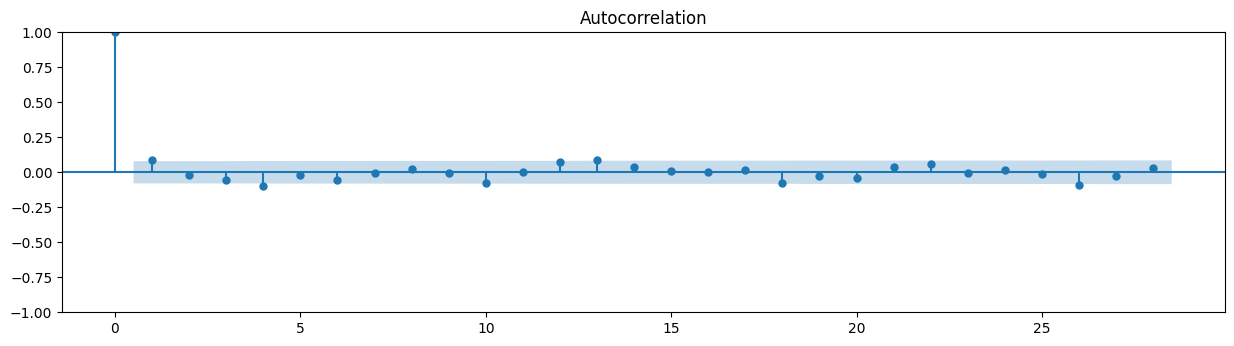

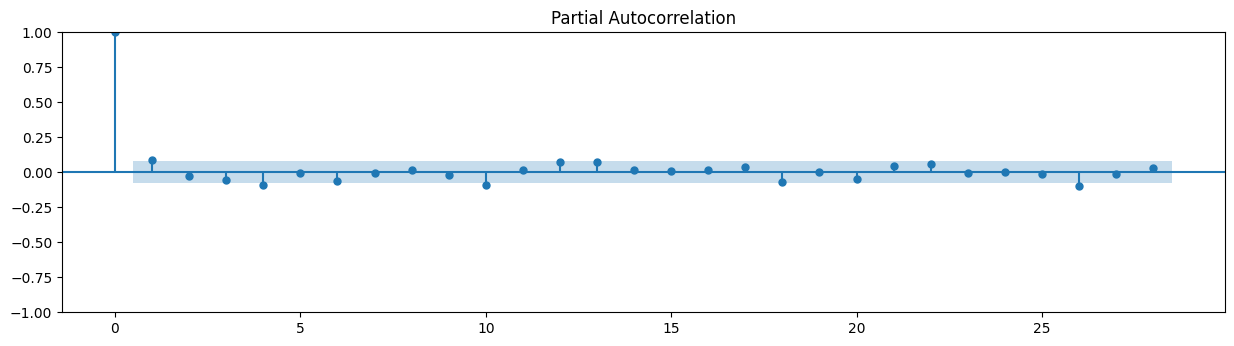

In [22]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(commodities_portf['diff'][1:].values.squeeze(), ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(commodities_portf['diff'][1:].values.squeeze(), ax=ax)
plt.show()

In [23]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import scipy.stats as stats


def ticket_distr(df, ticket):
    fig, ax = plt.subplots(figsize=(10, 6))

    values = df[ticket]

    shape, loc, scale = stats.t.fit(values)
    x = np.linspace(values.min(), values.max(), len(values))
    pdf = stats.t.pdf(x, shape, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

    ax.hist(values, bins=50, density =True,alpha=0.5)
    ax.plot(x, pdf, 'r-', lw=2, label=label)
    ax.legend(loc='best')
    ax.set_title(ticket)

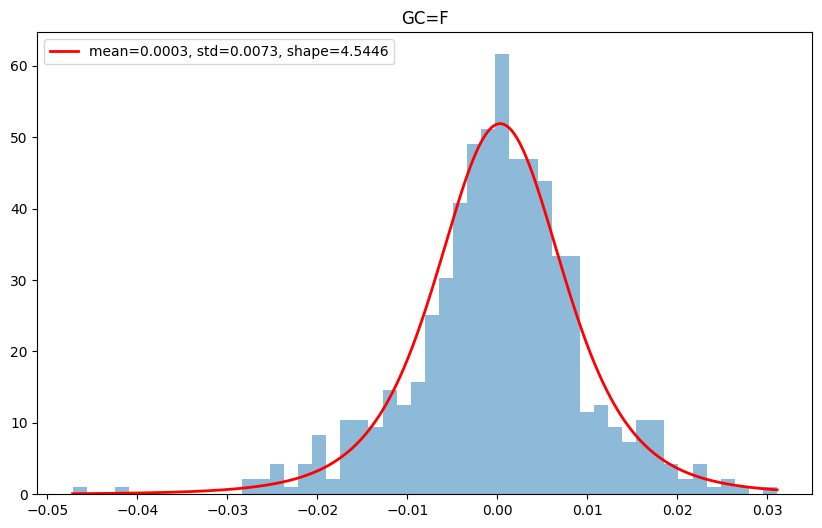

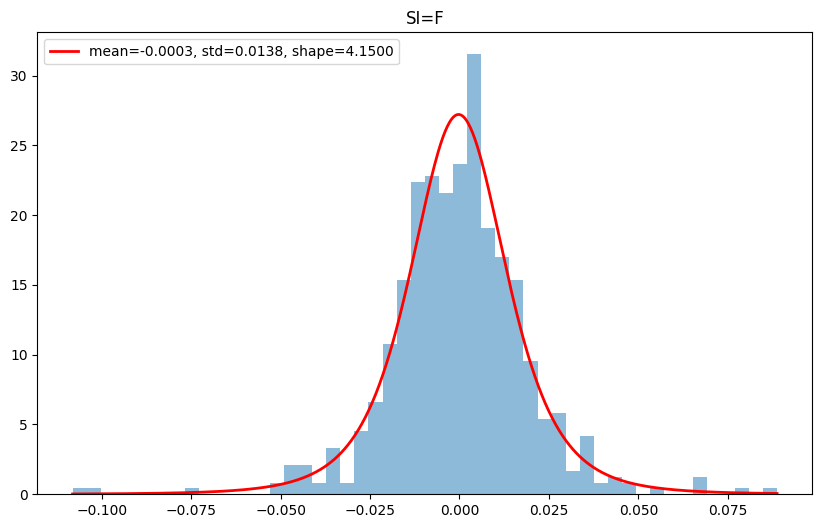

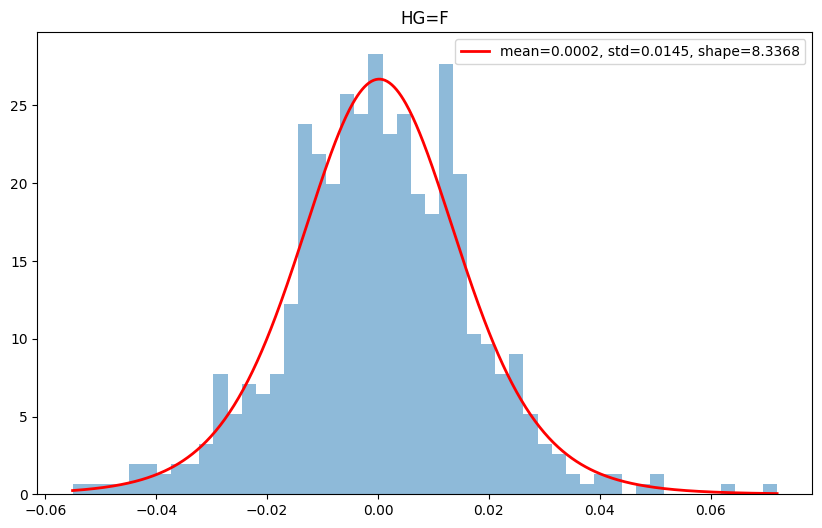

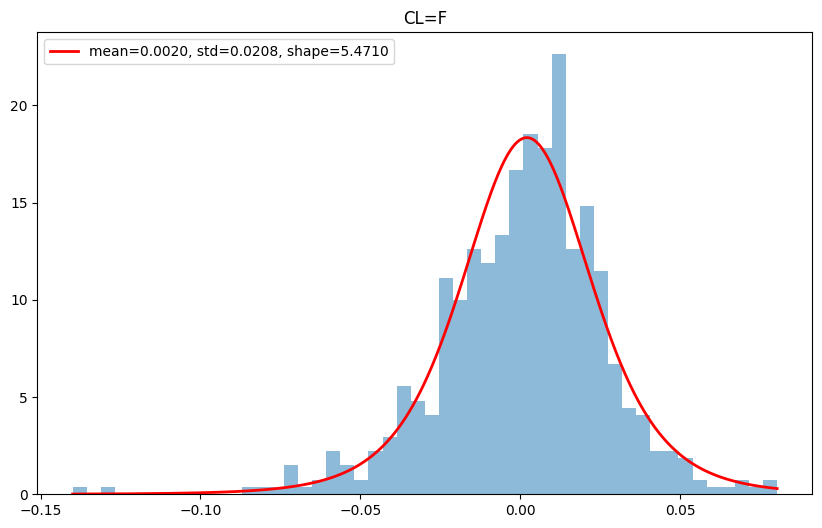

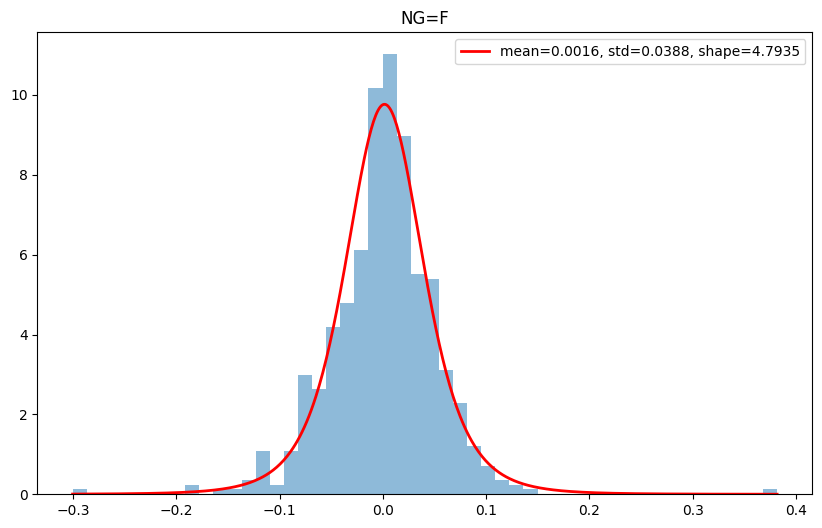

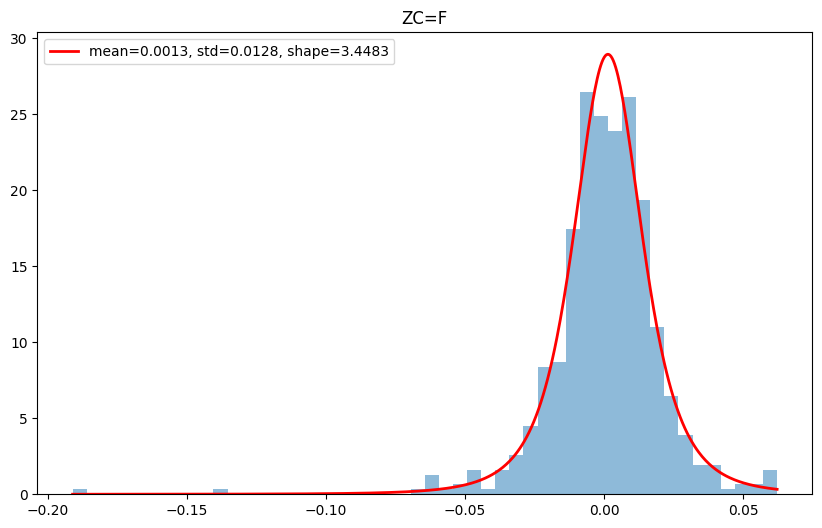

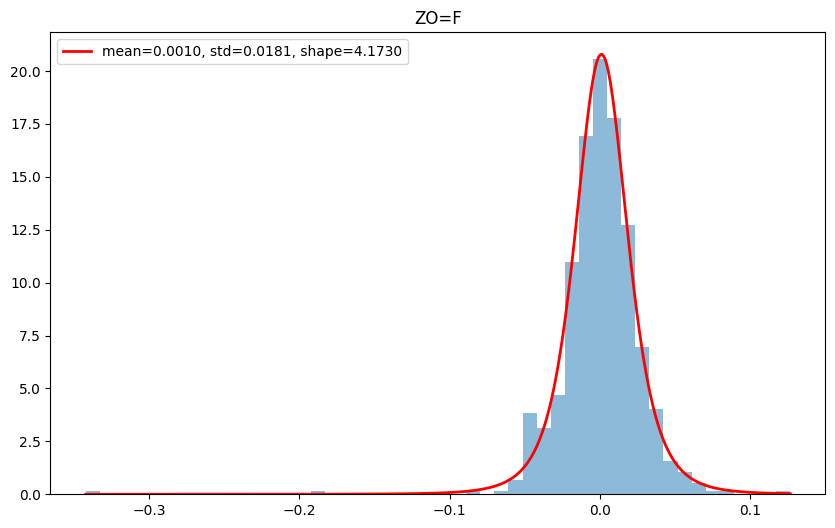

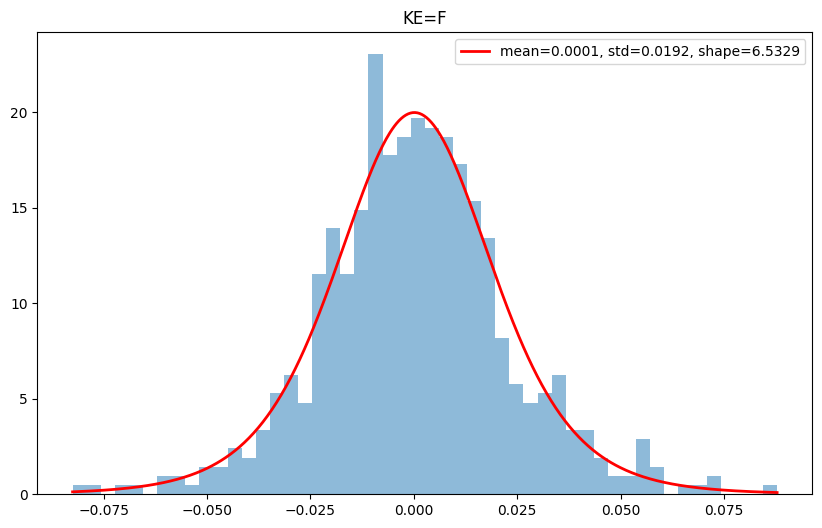

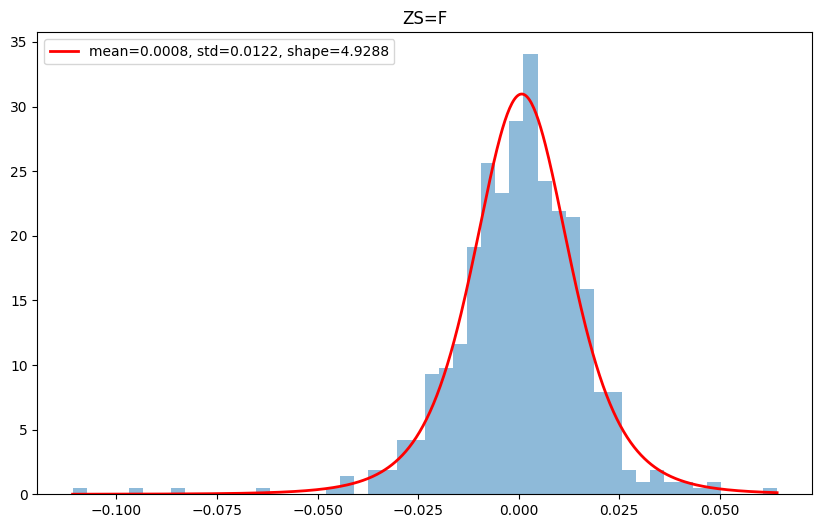

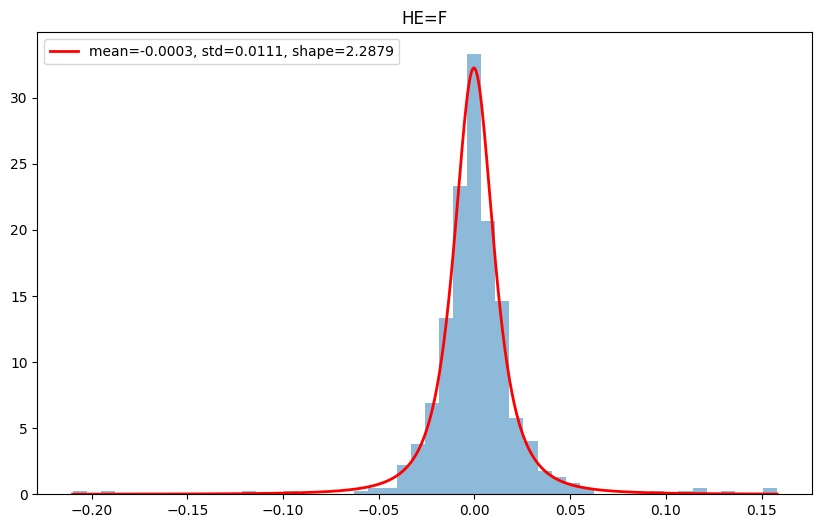

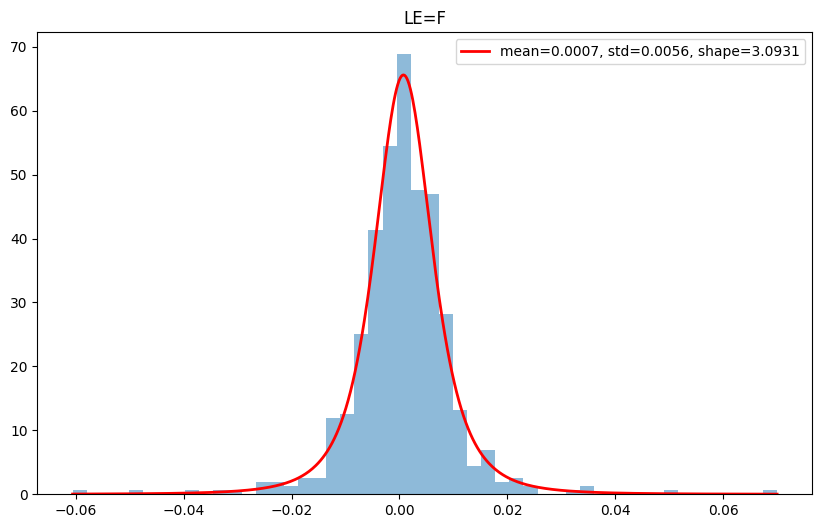

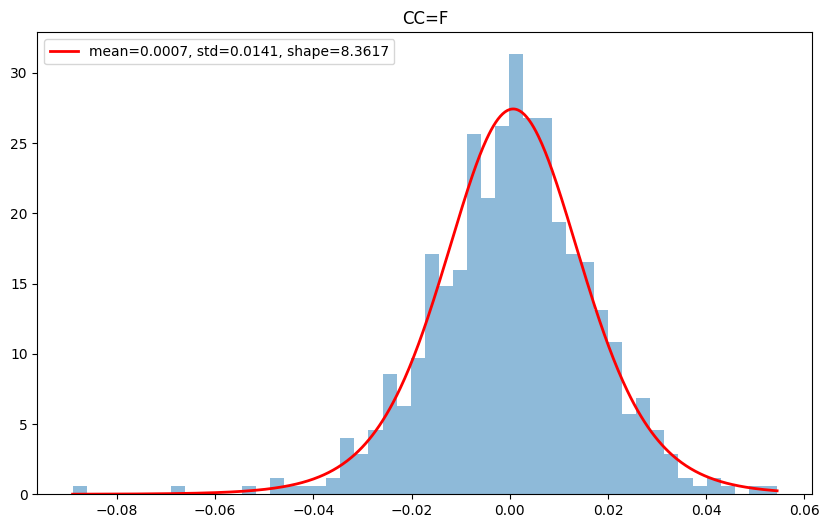

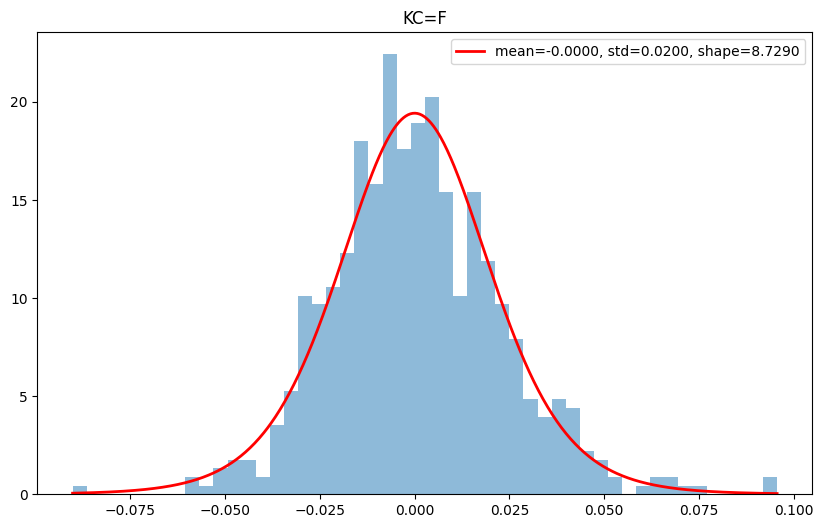

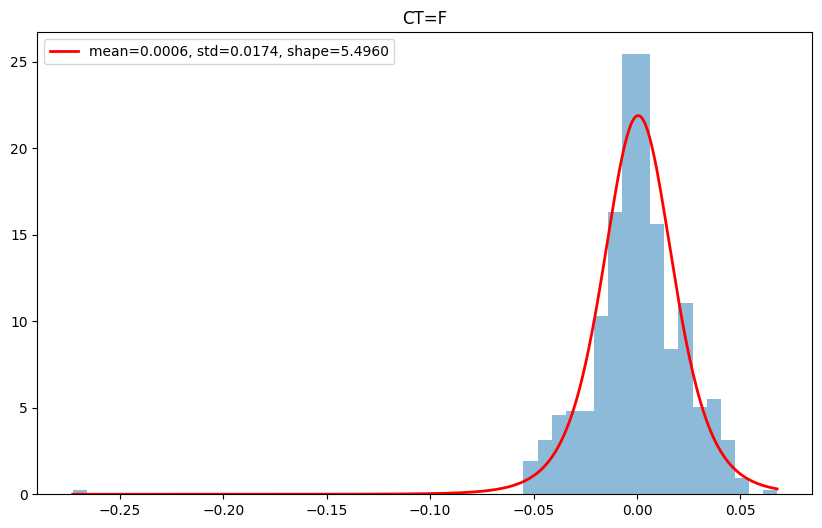

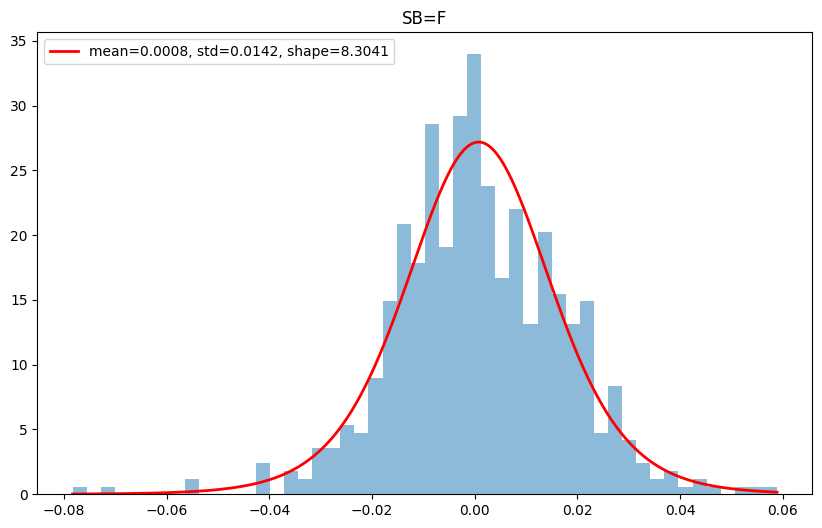

In [24]:
for ticket in commodities.columns:
    ticket_distr(commodities_change[1:], ticket)

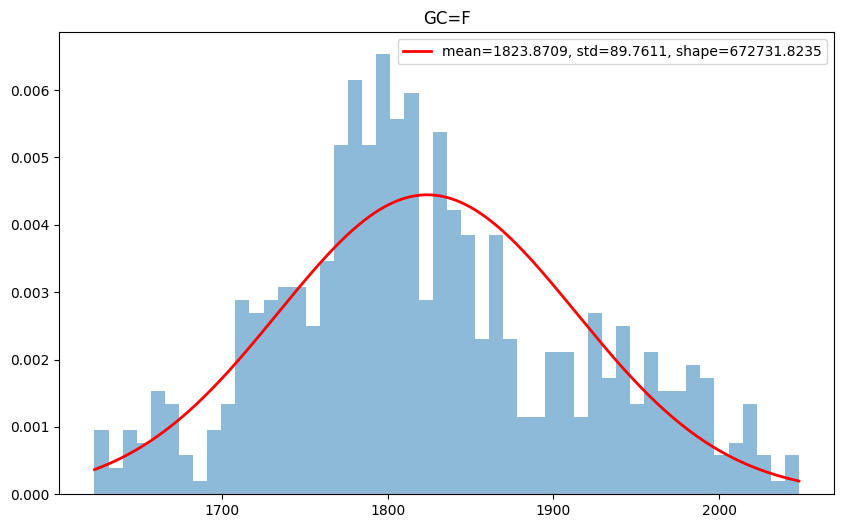

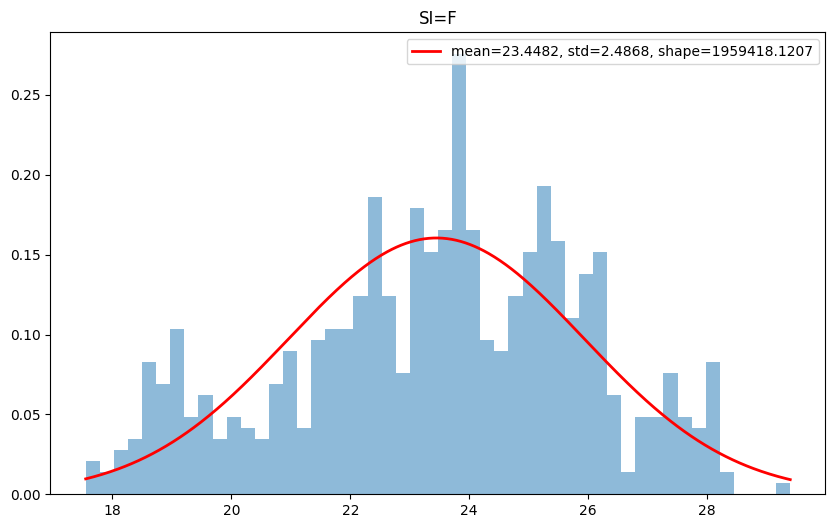

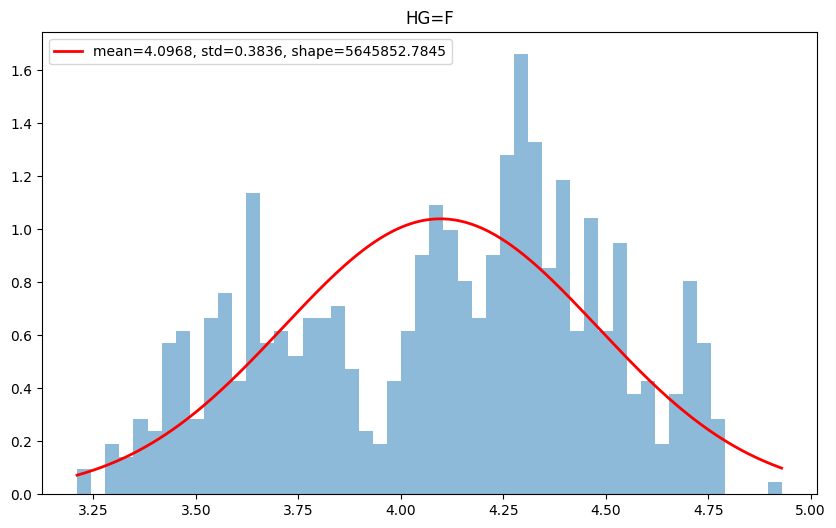

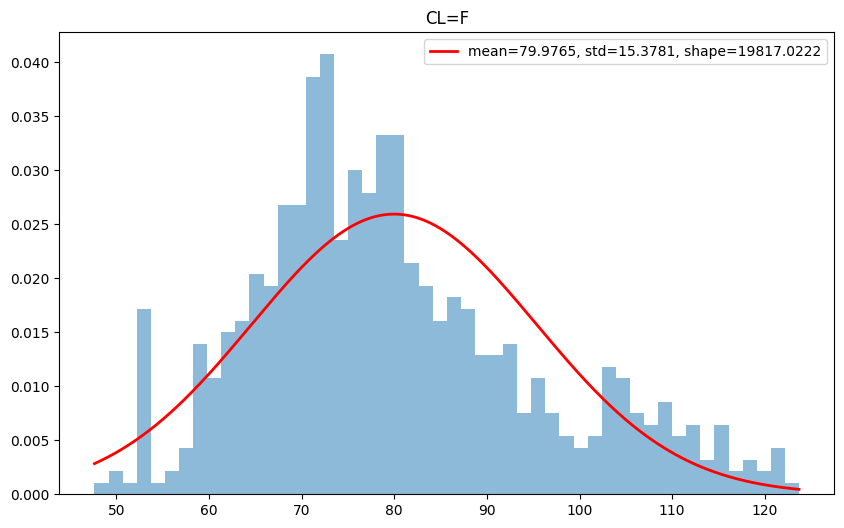

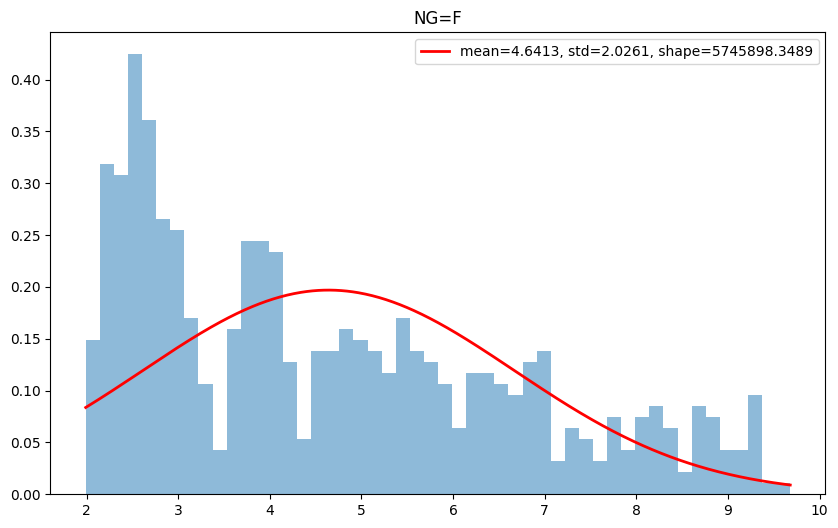

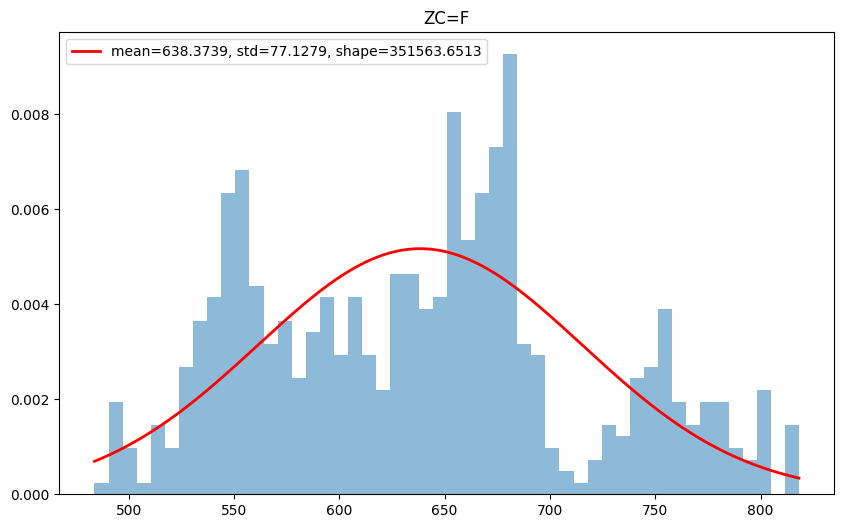

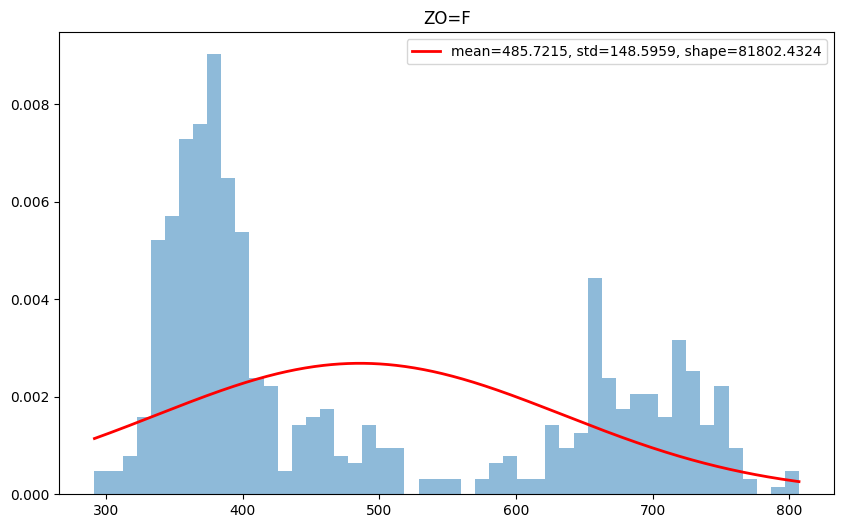

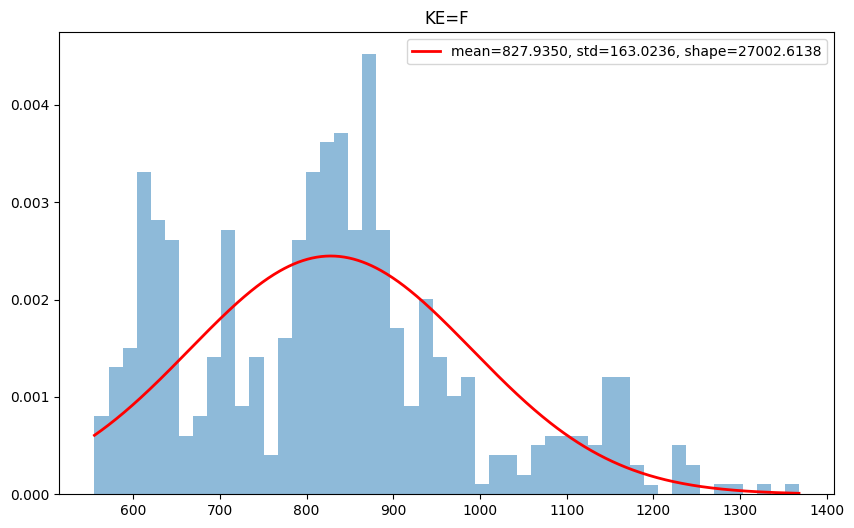

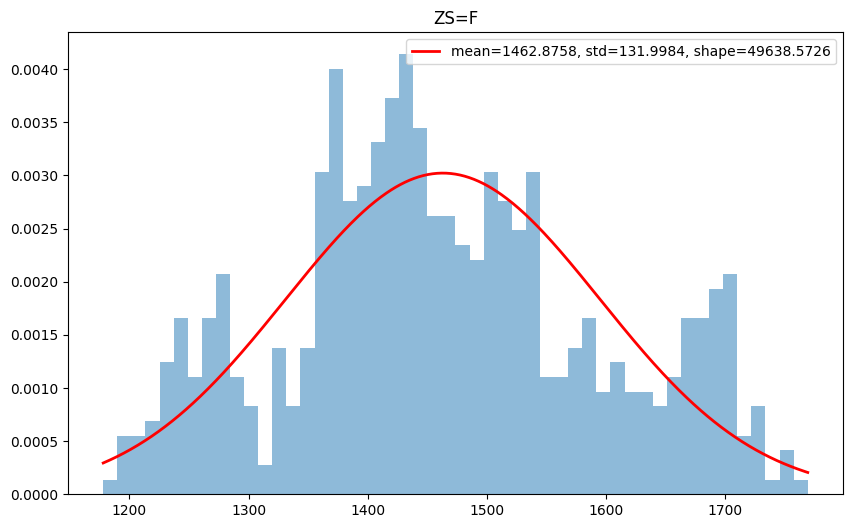

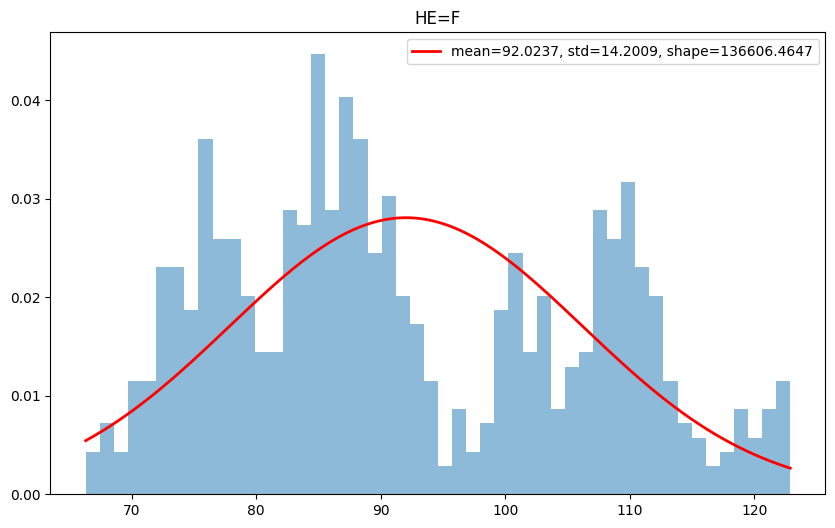

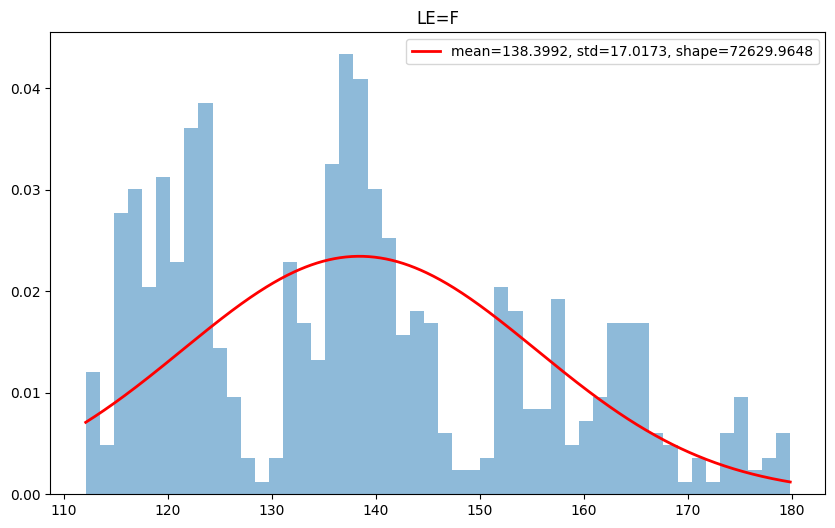

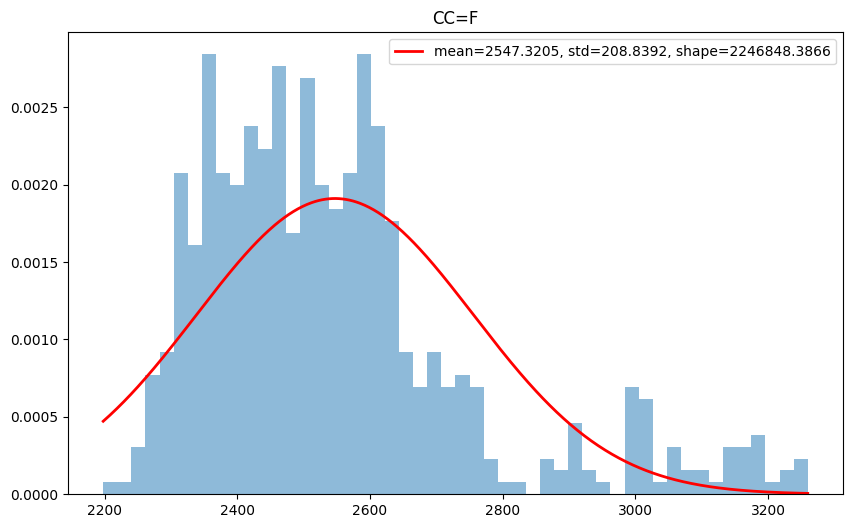

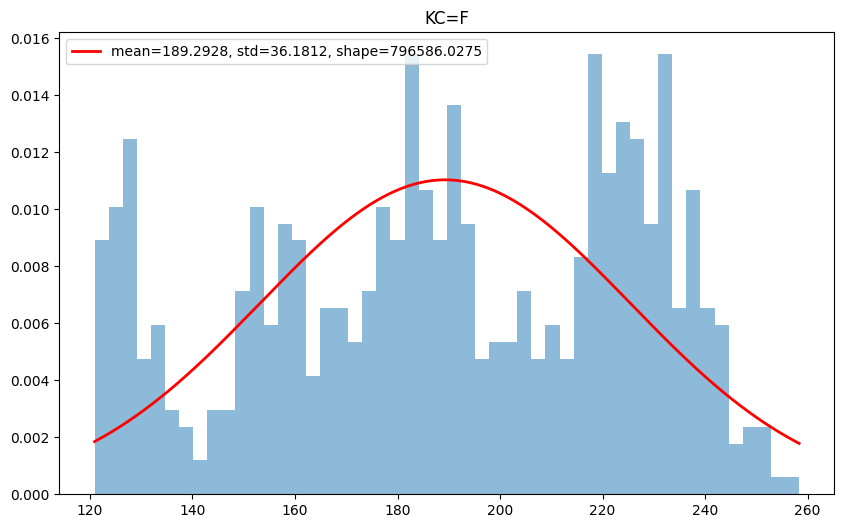

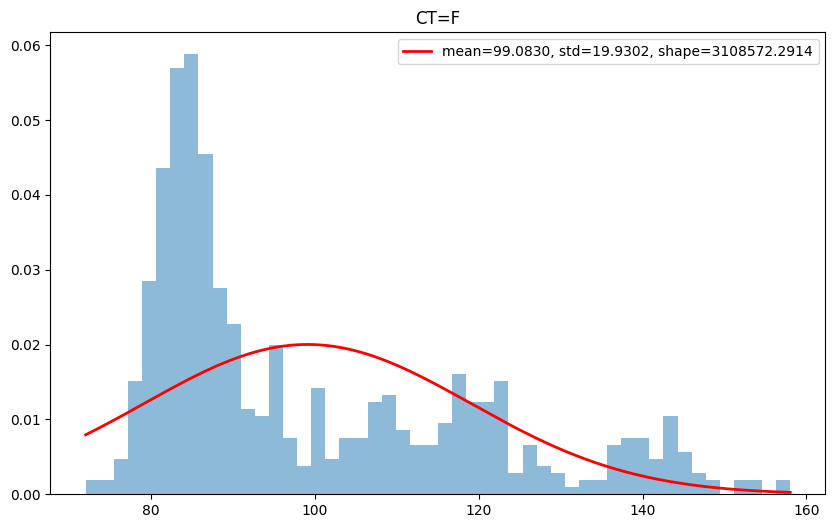

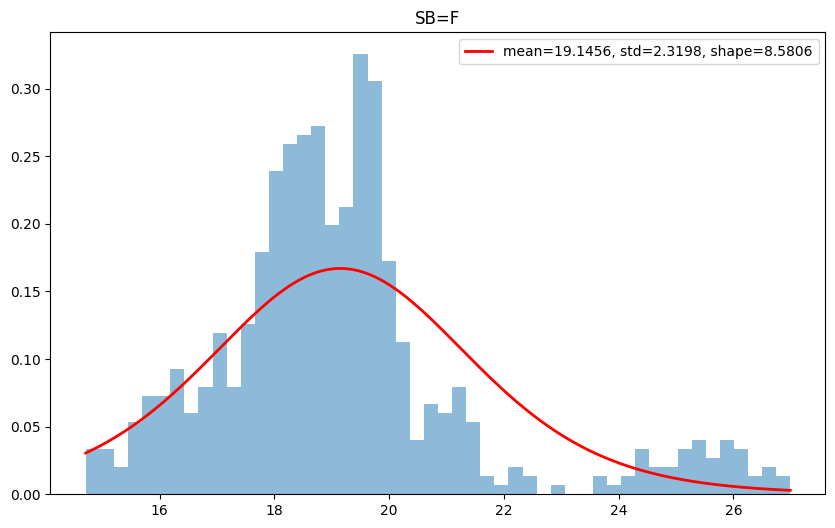

In [25]:
for ticket in commodities.columns:
    ticket_distr(commodities, ticket)

<Axes: >

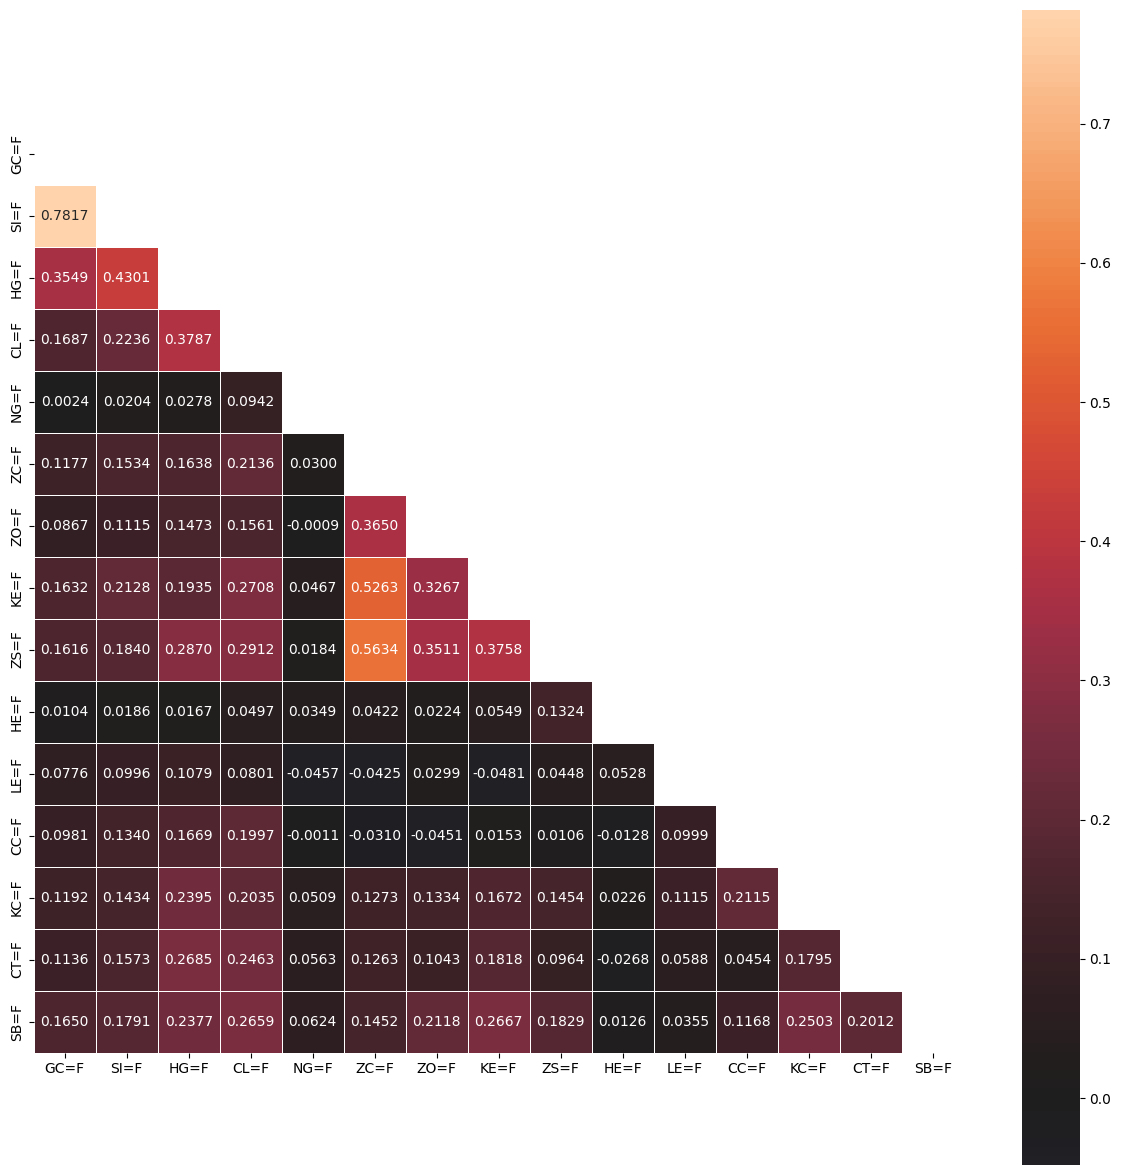

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = commodities_change.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)